# Processing growth data from *Escherichia coli* - the world's most popular model organism
Daniel P Brink, Division of Applied Microbiology, Lund University.

Adaptation for GoogleColab use by Guillermo Vélez Jiménez, Division of Biotechnology, Lund University.

### Intended Learning Outcomes:
**1. To gain experience in using the following libaries:**
- [matplotlib](https://matplotlib.org) for visualizing 2D and 3D data.
- [NumPy](https://www.numpy.org) for manipulating and doing operations on arrays.
- [pandas](https://pandas.pydata.org) for reading in data and represent data in tables.  
- [seaborn](https://seaborn.pydata.org/index.html) for setting nice colour palettes for matplotlib plots
- [SciPy](https://www.scipy.org) or [lmfit](https://lmfit.github.io/lmfit-py/) for fitting.
- The [os](https://docs.python.org/3/library/os.html) module for reading and navigating directories on the hard drive

      
**2. To gain experience in using Jupyter notebook relevant features such as:**
- Marking up text and equations with Markdown and LaTeX.
- Data visualization.
- Magic commands (%).
- Inserting images.
- Built in help functionality.


**3. Understanding basic scientific techniques and models such as:**
- Loading and parsing datasets containing microbial growth data.
- Processing multiple biological replicates from the same experiment. Calculation and visualization of averages and standard deviations.
- Visualizing microbial growth data and calculation of growth rates
- Evaluating mathmatical expressions.

**4. Basic python scripting such as:**
- Datatypes and objects.
- Datastructures.
- Loops.
- Functions.

**5. Searching documentation and help online**

**6. Generation of publication ready figures.**

### Imports

In [ ]:
from IPython.display import Markdown, IFrame, Image
import ipywidgets as widgets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# displays the plots inside the Jupyter notebook, inline with the code blocks
import seaborn as sns # the seaborn package can be used to set good-looking colour palettes for plots

import os # Later on in this notebook (Sections 2 and 3), we will accessing and reading directories on the hard drive using the os module.
from os.path import isfile, join

#my_wd = os.getcwd() # This line saves the path to the starting directory where the notebook file (.ipynb) is located.
                    # We will later use this to tell Python where to look for our data files
#print(my_wd)

## Introduction

### The notebook

In this project, you will work with real growth data from the bacterium *Escherichia coli*. You will practice loading and handling large datasets split over multiple files, working with data from replicated experiments, and making plots and performing calculations that are commonly used for microbial growth data. The notebook is divided into 3 main sections:

1. [Plotting growth data from *E. coli*](#section1)
2. [Automating the processing of multiple datasets using loops](#section2)
3. [Calculating microbial growth rates](#section3)

This notebook has been designed in a way that will make us practice a concept known as *stepwise refinement*. This is a fancy way of saying that we can first design several simple components that we want our final script to have, and then bit by bit combine the components into a more complex project. This means that instead of asking you to building a complex script from the start, we begin by implementing one of the components we would like our final code to have. We test it and after we have made the component work like we desire it to, we can take the code and use it to implement new functionalities to our project. In this manner, we will eventually be able to reach fairly complex pieces of code, with the added benefit that we have probably understood each step of the code along the way!

Chances are that as you are working on the notebook, you will not think too much about doing stepwise refinement. But as you reach the more challenging tasks later on in the notebook, you will hopefully be able to use the knowledge you have gained along the way to help you solve the more advanced excercises.

## 1. Plotting growth data from *E. coli*
<a id='section1'></a>

As you have probably learned in your previous courses, microbes can often grow in a range of different temperatures but tend to have an optimal temperature where it grows the fastest. The span of the temperature range and the optimal growth temperature typically differs between species, and sometimes even between strains from the same species. In textbooks, the optimal growth temperature of *E. coli* is often reported to be 37 °C, i.e., the average temperature of the human body. In this notebook you will work with a public dataset containing growth data from *Escherichia coli* strain K12 NCM3722 (Katipoglu-Yazan et al., 2023). The cells were grown in a minimal medium with glucose as substrate at 19 different temperatures ranging from 27 °C to 45 °C. Using this dataset, we will investigate how temperature affects the growth of *E. coli* and see if it really grows the fastest at 37 °C.

The growth data we will be using was captured using 48-well microtiter plates (Figure 1) at 19 different temperatures ranging from 27 °C to 45 °C. Each temperature setting was assessed in 40 replicates, i.e., 40 of the 48 wells were occupied with cells. Each well typically has a maximum volume of 400µl, and to not risk samples spilling over from one well to another when the plate is agitated for the sake of mixing, each well would probably contain 2-300µl of culture. The cells were grown in a minimal medium with glucose as substrate. Sterilized growth medium was added to the wells and a pre-culture of *E. coli* cells were inoculated to a low initial biomass concentration. The plate was then incubated in an automated plate reader that controls the temperature, shaking, and measurement of optical density (OD). The cells eventually started to duplicate themselves and there was be an increase in the number of cells, i.e. growth. The growth was be measured as discrete data points, but at a fairly frequent measurement interval. In this dataset, the OD was measured every 10 minutes.
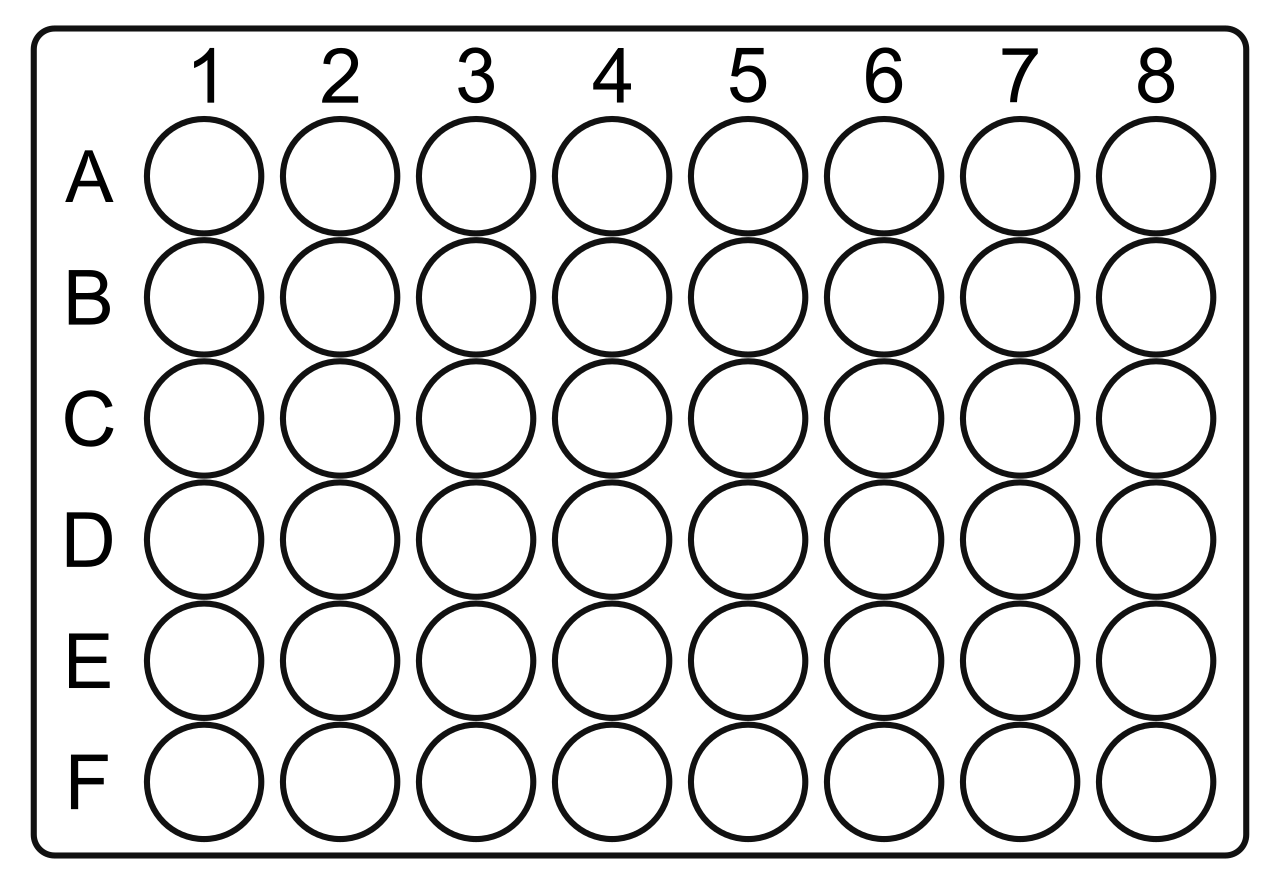

<br>

<p><center><b>Figure 1:</b> An overview of a 48-well microtitre plate. Source: <a href="https://commons.wikimedia.org/wiki/File:48-well-plate.svg">Wikimedia Commons</a> </center></p>

**(1) Biotechnology task:** <br>
What is Optical Density (OD)? How is it measured? What alternative methods exist to measure biomass? What are the benefits and drawbacks of OD compared to the other methods?

In [ ]:
# -- YOUR ANSWER HERE --
# ---------------------

### 1.1. Load the data using Pandas and make a first plot

In this first section of the notebook, we will work with the data captured at 37°C. This data is stored in the file named *Ecoli_MicroplateGrowth_37C_Filtered.csv*.<br>

To load the data we can use the read_csv() function that was introduced in the notebook from the Pandas lecture:

```python
#remember you need to download the data and set the filepath
!git clone https://github.com/luchem/Kemm30.git --depth=1
path_to_files=os.sep.join([os.getcwd(),'Kemm30', 'lectures', 'Data']) #You will have to change the filepath to get the    right data!!!!!
df = pd.read_csv(path_to_files + os.sep + 'filename.csv')
df # display the dataframe
```

Here we tell Pandas to look in our current directory for a subdirectory called *ecoli_growth_data/* that in turn contains a file named *Ecoli_MicroplateGrowth_37C_Filtered.csv*. The whole string, *ecoli_growth_data/Ecoli_MicroplateGrowth_37C_Filtered.csv*, is known as a path. Specifically, it is a *relative path*, since it only tells how to get to the new directory starting from the current directory. An *absolute path*, on the other hand, can be reached from any directory in the file system; for instance: *C:/Users/Daniel/Desktop/python_course/ecoli_growth_data/Ecoli_MicroplateGrowth_37C_Filtered.csv*. The examples in this notebook will be using relative paths.

*Bonus comment for those who are interested in a little more advanced discussion:*<br>
Forward (/) and backward (\\) slashes have special functions in many programming languages. Backslashes are often used to enable the printing of special characters, tabs, and newlines in a string; this is known as [string escape](https://www.w3schools.com/python/gloss_python_escape_characters.asp). The issue is that in Windows, paths are by default written using backslashes, which can lead to errors when Python interprets the backslash of the path as an escape character. Unix systems, such as Linux and Mac OS instead use forward slash for paths, so you might get errors when if your code was developped on one type of OS but run on another. The *r'* notation used in this notebook tells Python to treat the slash (in this case a forward slash) as a raw string, which means that what you typed is what the computer will interpret. Depending on the operating system you are currently using (Windows, Mac OS, Linux distrubutions) you may or may not get an error by not using the *r* when you declare the path to a directory. (Windows users could probably omit the *r* and still have a functional code). It doesn't hurt to include it, though, so let's do that for good measure.

**(2) Python task:** <br>
Load the data from the 37°C experiments as a Pandas dataframe using the code above. Display the dataframe so that you can have a look at the data.

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

The dataframe loaded from *Ecoli_MicroplateGrowth_37C_Filtered.csv* consists of 125 rows and 41 columns. Each row corresponds to a time point in which the whole microplate was scanned. The column "Time_in_hr" shows the time of capture. <br> <br>
The other columns contain the 40 different biological replicates of the same strain. The numbering of the replicates is based on the well coordinates shown in Figure 1 above. This means that in each .csv file there are: <br>

$$
  40 \text{ replicates} \times 125 \text{ time points} = 5000 \text{ data points}
$$

The size of this dataset is thus a good example of case where we will benefit a lot from using a systematic programming approach to processing, plotting and calculation of key parameters. By working with this notebook you will hopefully understand the benefits of using a progamming approach to analysing your data. Imagine handling 19 files that each contain 5000 data points using Excel... It is doable, but it will likely take a lot of effort.


**(3) Python task:** <br>
The headings of the columns in a data frame often contain valuable desciptions of the data it contains. In the previous task, you most likely did not get a display of all the headings in the dataframe - it might have been truncated. Let's practice how to extract all the headings. Make a list of all the column headings from the dataframe. Compare the headings to drawing in Figure 1 above. Does it match? Are all wells represented, or are there some wells that are not included?

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

Now let's try visualizing some of the data! There are 40 replicates in each .csv file, so let's start by plotting one of the replicates, e.g. A1. Plot the *Time_in_hr* column on the X-axis versus the OD values from the A1 replicate on the Y-axis. Try to reproduce this figure:

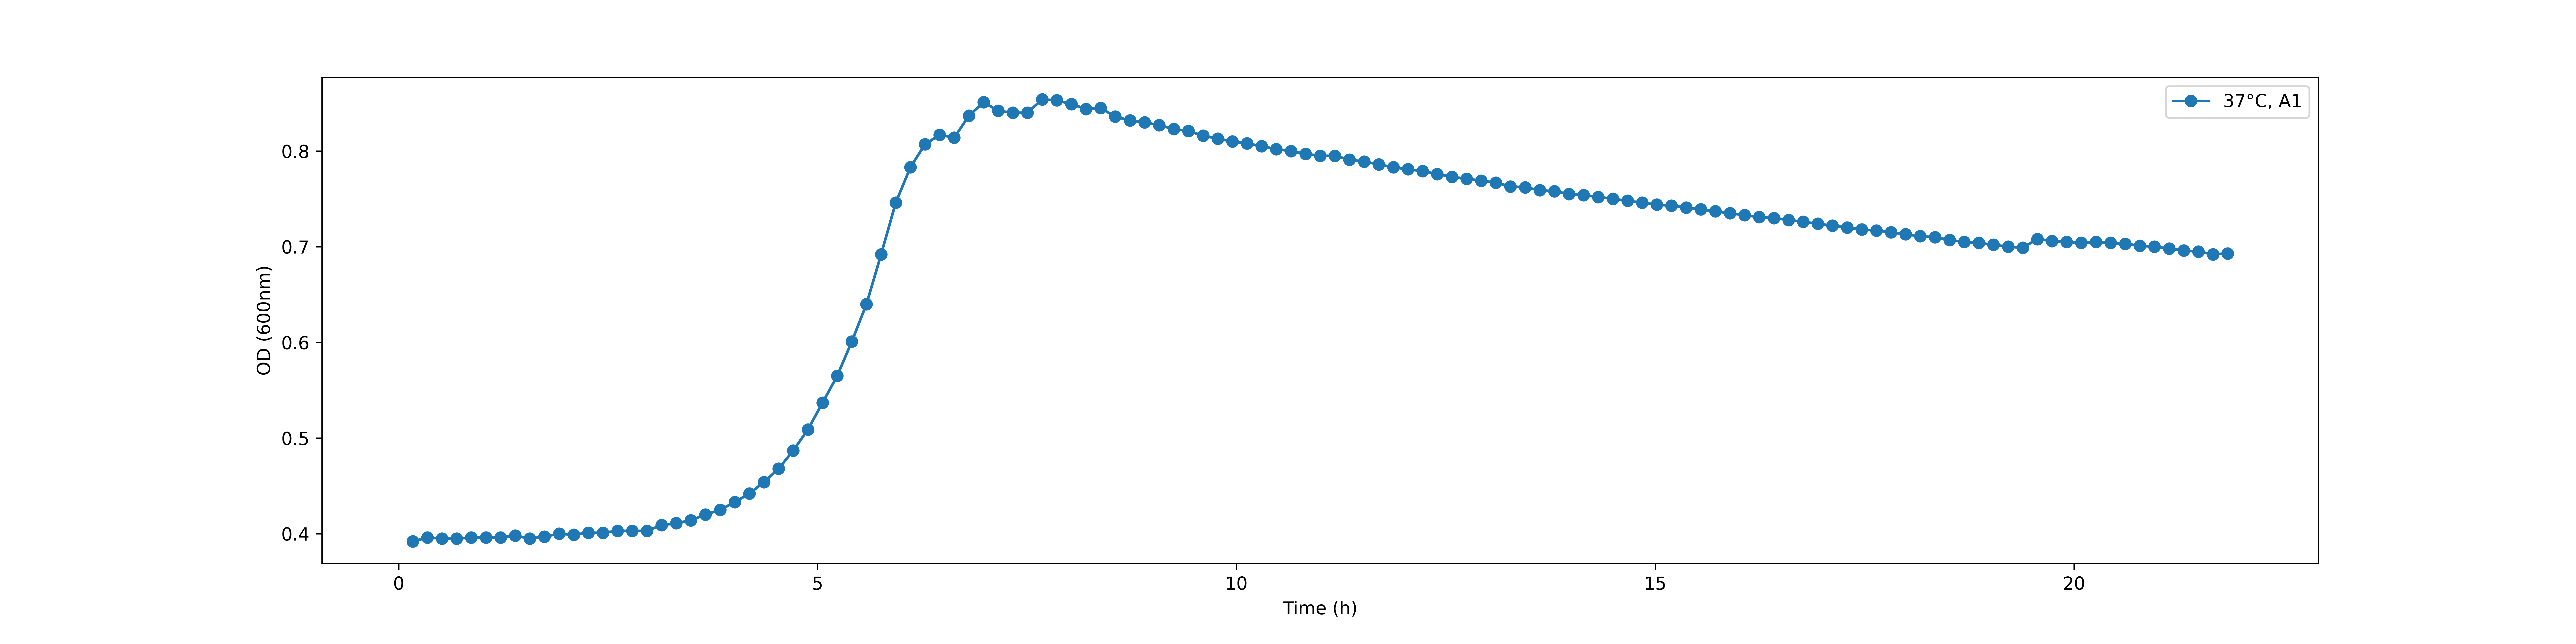
<p><center><b>Figure 2:</b> <i>E. coli</i> growth at 37 °C from replicate A1. </center></p>

**(4) Python task:** <br>
Plot the results from the A1 replicate (Time versus OD) using the matplotlib syntax you have learned in the course. Add axis labels and a title. Use a marker, such as 'o', to show that the data contains discrete datapoints.


In [ ]:
# -- YOUR CODE HERE --
# ---------------------

**(5) Biotechnology task:** <br>
Microbial growth curves can be divided in different phases based on the rate of growth within each phase. What are the names of the different phases of the growth curve?

Hint: if you need to refresh your memory, you can read the Wikipedia article: [Bacterial growth](https://en.wikipedia.org/wiki/Bacterial_growth). <br>

In [ ]:
# -- YOUR ANSWER HERE --
# ---------------------

### 1.2. Processing and plotting data from multiple replicates

A characteristic trait of biological systems is that they are *noisy*. This means that there can be a high variability between multiple repeated measurements of the same parameter. In microbiology, even two cells derived from the same parental cell can have small differences in their phenotypes depending on the local environment and the genotype of the cell (i.e., mutations). For instance, one cell might be at a position in the culture medium with a slighlty lower sugar concentration, and consequently grow slightly slower than its sibling cell that is positioned in a place with a little higher availability of sugars. Situations like this can result in that the signal of the parameter that we want to measure can have a high variability. When the variability becomes too high, we risk getting more noise than signal in the system we're measuring and, as a consequence, we will have a hard time interpreting the results.

Because of the inherent variability in our world, all scientific experiments - be it in natural sciences, medicine, or social sciences - requires replicates and statistics. Since biological systems can have an especially high variability, biological research requires us to perform many replicates. Performing experiments in replicates also allows us to do statistical analyses of the data to assess the variability and evaluate if a certain response is significantly different from another. In this notebook we focus on basic ways of handling data from multiple replicates using averages and standard deviations. (We will not go into statistical tests such as the *t-test* or *ANOVA*, since this is not a course in statistical analysis. However, for those of you who are interested in such tests, the scipy package comes with functions to perform different statistical tests.)

Furthermore, in the biological sciences, we make a differences between *technical replicates* and *biological replicates*.

A *technical replicate* means that a measurement is performed multiple times using the same instrument and sample. For example, we inoculate a single colony in a shake flask, incubate it and let it grow for a while and then take a sample and measure the biomass content. We can measure this sample multiple times in the same instrument. Most likely we will get slightly different absolute numbers each time. This is the technical variability of the sample. It shows the variability of the method that was used, for instance how much a spectrophotometer differs between multiple measurements of the same sample. If we measure the sample multiple times, we can calculate the average value and the standard deviation of all the replicates. Ideally, we would like the method to produce similar results each time, i.e. we would like the standard deviation between the measurements to be as small as possible. Most mathematical software has built-in functions for taking the average and standard deviation. When working with Pandas dataframes, we can use .mean() and .std() to do this.

A *biological replicate*, is when we compare samples that are biologically separated. When working with single cells, we do this by using a different cell culture for each sample. The easiest way to achieve this is that we take a new colony from our agar plate for each culture that we inoculate. Then we prepare our sample just like we would for the technical replicate and perform the measurement. Since biological systems are known to be noisy, the biological replicates will typically have a larger variability than the technical samples. To be able to show that something is biologically reproducible, we typically first use the technical replicates to ensure that the measurement method is reliable, and then use the biological replicates when performing the statistics.

The metadata from Katipoglu-Yazan et al. (2023) dataset is a little vague on whether the replicates are technical or biological replicates. However, it says that the measurements for the different temperatures were made using "40 replicated cultures", which hopefully means that all 40 replicates were biological, i.e. each coming from a different starting colony on the agar plate. For the sake of this notebook, we will assume that the replicates in the dataset are biological replicates.

OK, let's have a look at the variability between the replicates in your dataset!

**(6) Python task:** <br>
Plot the OD results from four different replicates - A1, B2, C3, and D4 - as individual curves in a single plot. Use a different colour for each replicate. Use a marker to show that the data contains discrete measurements. Add labels to the axes, a legend for the curves, and a title to help the reader understand the plot.

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

**(7) Biotechnology task:** <br>
Look at the plot you just generated. Do you see any differences between the replicates? If yes, what do you think is the reason?

In [ ]:
# -- YOUR ANSWER HERE --
# ---------------------

As mentioned above, a common approach of handling multiple replicates is to calculate the mean and standard deviation of all the replicates. In short, the thinking is that if the standard deviation from the mean is small enough, the reproducibility of the experimental setup can be considered good. Let's calculate the mean and the standard deviation for the replicates in the 37 °C file.

**(8) Python task:** <br>
Using the dataframe we created earlier as a starting point, create a new dataframe that contains the time, OD of each replicate, the mean of all replicates and the standard deviation of all replicates <br>

Hint: Remember to not include the first column (Time_in_hr) in the calculations of the mean and the standard deviation! That column contains the time of each sample, and not the optical density...

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

Now we have a dataframe containing the mean and standard deviation from all the 40 replicates at 37 °C. Let's investigate how the mean of our data looks like.

**(9) Python task:** <br>
In a single figure, plot the mean of the replicates together with the data from replicates A1, B2, C2, and D4. Plot the mean in black colour so that is stands out from the other curves. Add labels to the axes, a legend for the curves, and a title to plot to help the reader understand the plot. In the label for the mean data, please specify that the number of replicates used to calculate the mean (n=40)

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

**(10) Biotechnology task:** <br>
In the figure you just plotted, the mean is probably closer to the A1, B2, and C3 replicates than to the D4 replicate. What does that tell us about the overall performance of the bacterial cells from this experiment (37°C)? Do you think that the mean is a good representation of the replicates in this dataset?

In [ ]:
# -- YOUR ANSWER HERE --
# ---------------------

An issue with using the mean of all our replicates is that it does not show how much the different replicates varied, only how they performed on average. To better be able to show that the data contains variability, it is common to add the standard deviation as error bars to our mean data. In the figure below is an example of how these plots often look like.


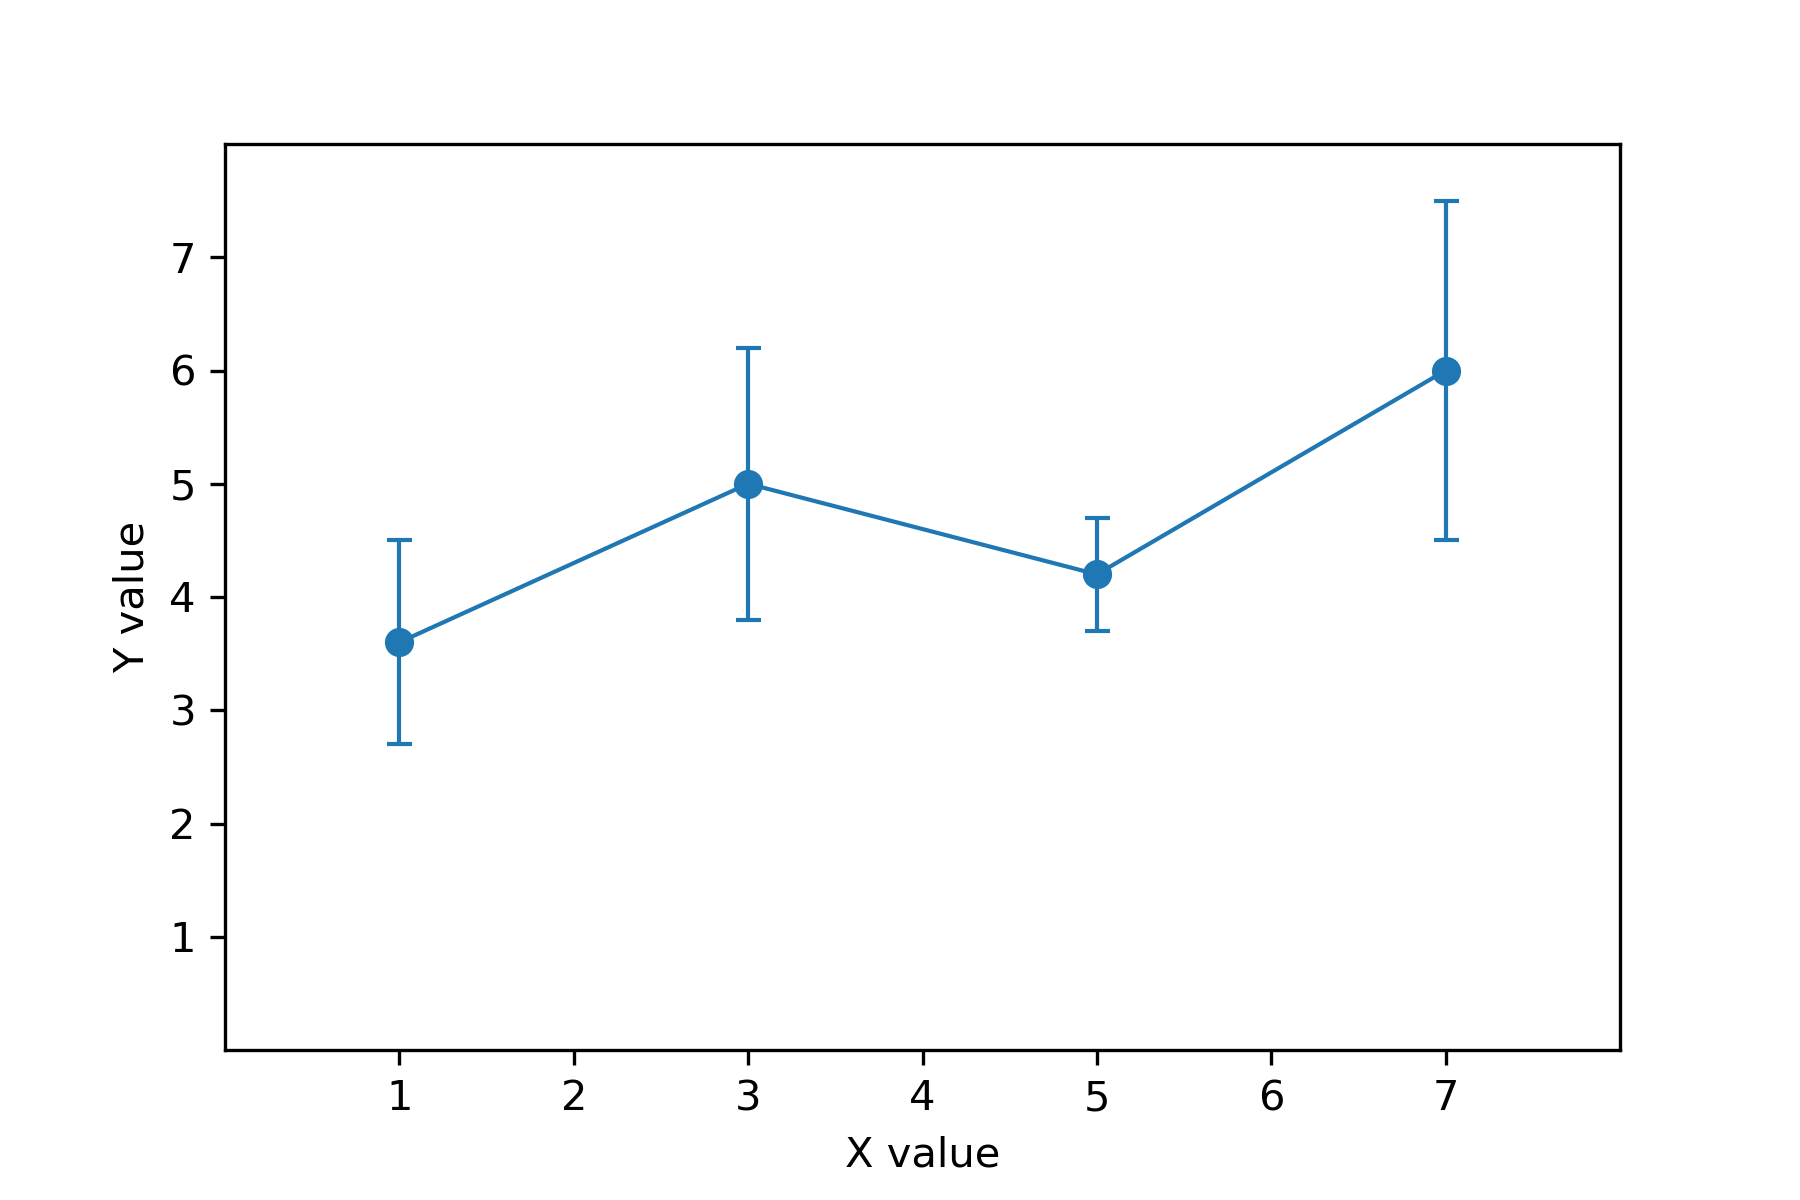
<p><center><b>Figure 3:</b> Example of a plot of the mean values of discrete datapoints and error bars with the corresponding standard deviation.</center></p>


One way to plot error bars with matplotlib is to use this function:
```Python
ax.errorbar()
```

You can read the documentation <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html#matplotlib.axes.Axes.errorbar">here</a>.

**(11) Python task:** <br>
Plot the mean of the replicates and display the standard deviation as error bars.

Hint: the arguments *linewidth* and *capsize* of ax.errorbar() can be used to control the look of the errorbars

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

**(12) Biotechnology task:** <br>
Your plot probably showed that the standard deviation was smaller at certain time points and higher at other time points. Can you come up with any biological explanation as to why this could be?

In [ ]:
# -- YOUR ANSWER HERE --
# ---------------------

And just like that, we have created a small piece of code that reads the 40 replicates x 125 time points = 5000 datapoints from the 37 °C dataset, calculates the mean and the standard deviation of all the replicates for each time point, and plots the results. Very handy!

We should keep in mind that the code we have produced will only work for .csv files structured exactly like that data from Katipoglu-Yazan et al. (2023), i.e., each column is a biological replicate and each row is a new time point. Please keep in mind that if you get OD data from another experiment made by a different person, the data might be sorted in a different way... This highlights the importance of knowing how your indata looks like, and that you may or may not need a sorting step before you send the data to your script. There is no standard format for OD data! But sorting it in the way Katipoglu-Yazan et al. (2023) had done comes very naturally for working with Pandas dataframes. Also keep in mind that if you change to another programming language, there might be other preferred ways of sorting the data - if this had been a course in the R language (another popular language in the biological sciences), we might have wanted to sort and label the data in a slightly different way.

**(13 BONUS) Python task:** <br>
From our previous plots we have observed that some replicates were more outliers than others. We have yet to plot all replicates, so let's do that in this bonus task. In a real-life project, plotting all replicates would probably be the first thing we would do so that we could get a feeling for our data, but since the focus of this notebook is to practice Python, we skipped that step earlier.

The challenge of plotting 40 replicates in a single plot is that the figure will be hard to read: there will be many colours and markers. Instead, it might be more useful to split the data into subplots. For instance, you could make one subplot per row in the microtiter plate, i.e., one plot for A1-A6, one for B1-B6, etc. Remember that rows E and F in the dataset we are currently working with include eight datapoints and not six.

Is there a pattern in the data? Are the replicates from the same row of the microtiter plate reproducible? Are the replicates from the same column of the microtiter plate reproducible? If you want, you can load the data from another replicate too, and check if any patterns you observed in the 37 °C data are also present there.

Compare the variability of the replicates you have plotted to the standard deviations from the plot with the mean OD and standard deviation you just made in Task 11. What are your thoughts?

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

## 2. Automating the processing of multiple datasets using loops
<a id='section2'></a>

By now we have written code for loading the 37 °C growth data from its .csv file, calculating means and standard deviations, and plotting the data. Since microbial growth data is a very common data type in microbiology, this type of code is useful to have. You will probably be able to reuse this code in future courses and project, if you want. In this section of the notebook, we will work on making the code even more useful.

As you probably remember from when you unzipped the growth data, the zip archive contained 19 files. If we want to make the same plot that we made for the 37 °C data (Task 11), we could use the code we have already written and repeat it manually for each of the 19 files. There is nothing wrong with processing data in that way. But it is time consuming, cumbersome, and prone to error. Instead of doing this manually, we could write a loop to have Python do the work for us. We would like the loop to find all the .csv files in the directory we made, then load the .csv files one by one, perform the calculations and plots, and then repear this process for the remaining .csv files.

To do this, we will make use of a Python module called *os* that allows us to e.g. move between and look inside directories on the hard drive programmatically. In particular, we will use the following functions to get a list of all our filenames:

```python
os.listdir()
```



**(14) Python task:** <br>
Test the following code for yourself. By using *os.listdir()* we can get a list of all the files in a given directory. In the examples below we will use it on the *ecoli_growth_data* subdirectory located in our starting directory.

What result did you get? Did it contain the file names of all 19 .csv files you downloaded earlier? Were any other file types detected?

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

my_files=os.listdir(path_to_files) # Look in the folder we made called ecoli_growth_data and make a list of all the files therein.
                                          # The absolute path to this folder is [my_wd]/ecoli_growth_data, where my_wd is the absolute path to your current folder saved by os.getcdw() in our import cell at the top of the notebook

print(my_files)

Perhaps you noticed that the list of files was not presented in alphabetical order? That is because os.listdir() returns a list with arbitrary internal order. For most of our upcoming tasks, the order of the list will not matter much. But it can be easier to follow the processing of your datasets and debugging of potential errors if the files are sorted in a more intuitive manner. Design of sorting algrothms can be challenging task in computer science, but luckily for us, there are built in functions in Python that we can use. We can for instance use the .sort() function, which takes a list of strings and sorts them alphabeticaly from A-Z. The .sort() function makes permanent changes to the list, i.e. the sorting is applied and saved to the list object.

Try the following code if you want. Compare the outputs of the two print statements (one before the sort, and one after). Did you get the expected result?

```python
print(my_files)

my_files.sort()
            
print(my_files)

```

**(15) Python task:** <br>
Now that we know how to get a list of all the files in the directory, let's try looping over them. Here is an example code that loops over each file name in the list *my_files* and loads the corresponding .csv file.

Add your own code in the loop below so that the name of the file and the first few rows of the data frame is printed in each iteration of the loop.

Hint: *df.head()* prints the first rows of a Pandas dataframe

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

my_files=os.listdir(path_to_files) # Look in the folder we made called ecoli_growth_data and make a list of all the files therein.
                                          # The absolute path to this folder is [my_wd]/ecoli_growth_data, where my_wd is the absolute path to your current folder saved by os.getcdw() in our import cell at the top of the notebook

for file in my_files:                     # Now we make a loop that goes through all the file names we saved and reads them into Pandas dataframes
    if file.endswith('.csv'):             # We add an if statement here to make sure that only .csv files are passed to pd.read_csv. If we for instance have an .txt file or even a subdirectory in our datafolder, we will get errors since only .csv formatted files will work.
        path_to_file=os.path.join(path_to_files, file) # We have a list of all the file names, but we also need to give the path to the file since all our data is in another folder than our current folder
        df = pd.read_csv(path_to_file)
        #Your code here


OK, now that we have gotten a hang of the basics of looping over our .csv files, let's add some code to apply some of the data processing we worked with in Section 1.

**(16) Python task:** <br>
Write a loop that goes through each file in the directory in which you put the *E. coli* growth data files. Then, for each temperature (=.csv file) calculate the mean and standard deviation of all the replicates, and plot the mean of each replicate with the standard deviation as error bars. Plot all the results in a single figure.

Hint: For the contents of the loop, you can most likely reuse part of the code you wrote in Section 1.

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

You might notice that the colours of the curves can become a little hard to distinguish from each other when you plot 19 curves in the same plot... One way of handling this is to split the results into two or more subplots. Another way is to try to find a more suitable colour palette. Here is an example that uses the seaborn package to set the colour palette.

```python
import seaborn as sns

fig=plt.figure(figsize=(30,10)) #create a frame, as usual
ax=fig.add_subplot()

colors = sns.color_palette('hls', 19)   #call seaborn to create a palette of 19 colours.
                                        #(We have 19 .csv files, hence the number 19).
                                        #You can change 'hls' to another seaborn palette if you want
        
ax.set_prop_cycle('color', colors) #send the colour palette to the axes

ax.errorbar() # plot the data as you normally would
```

You can read more about the built-in palettes of seaborn <a href="https://seaborn.pydata.org/tutorial/color_palettes.html">here</a>. Some examples include *'hls'*, *'husl'*, *'Set2'*, and *'magma'*. Play around and see if you find any palette you like!

**(17) Biotechnology task:** <br>
Microbes have a range of temperatures in which they can grow. If the temperature of the environment becomes too low or to high for the microbe, the cells will become stressed and eventually cease their propagation. Looking at the graph you have just generated, at which temperatures does the growth of this *E. coli* strain seem to be affected? Does it look like this *E. coli* strain grows the fastest at 37 °C?

In [ ]:
# -- YOUR ANSWER --
# ---------------------

## 3. Calculating microbial growth rates
<a id='section3'></a>

The plots we have made so far have probably given you an indication of how this particular *E. coli* strain grows at different temperatures. Remember that the only difference between the data from the .csv files is the temperature - all other parameters were kept constant in all experiments. The optimal temperature for cultivation of *E. coli* is stated by many textbooks to be 37°C, which happens to be the average temperature of the human body. In this section, we will use the fact that our dataset contains growth data from 27-45°C to see if the maximum growth rate of this strain actually occurs at 37°C.

The visual inspection of the plots indeed gives us a lot of information. In addition to plotting the data, it is also common to quantify the growth by calculating the growth rate, $µ$. Specifically, we often want to calculate the maximum growth rate, $µ_{max}$, from different growth curves and then compare the values. Here we will eventually calculate and compare the $µ_{max}$ from all the 19 temperatures from our dataset.

### 3.1. The maths behind an exponential growth curve
As you discussed yourselves in Task 5 back in Section 1, microbial growth curves consist of several different growth phases. A common way to describe the growth during the lag phase and the exponential phase is by using exponential models of the form:

$$
  Y=Y_{0} e^{µ (t-t_{0})}
$$

Where $t$ is the time in hours, $Y$ is the number of cells at time point $t$, $µ$ is the growth rate at that time point, a $Y_{0}$ is the number of cells at the starting time point $t_{0}$.

This means that we can solve for the growth rate ($µ$) by:
$$
  µ=\frac{ ln( \frac{Y}{Y_{0}} ) }{t-t_{0}}
$$

According the properties of logarithms, we can re-write the equation as:

$$
  µ=\frac{ ln(Y) - ln(Y_{0}) }{t-t_{0}}
$$

This is the equation we will be working with in this section. You can compare this to the general formula for finding the derivative of a point on a curve, and hopefully see that they are very similar:

$$
  \frac{dY}{dX}=\frac{Y-Y_{0}}{X-X_{0}}
$$

That means that to find $µ$ at a given point in a microbial growth curve, we need to be able to calculate the slope of the natural logarithm of the biomass curve at that point.

One way of finding $µ$ from a microbial growth curve is plot the natural logarithm ($ln$) of the cells versus time. We call this a semi-log y plot.

We are often interested in finding the maximum growth rate µmax, which is the point of the semi-log y plot with the largest $µ$ (steepest slope).


**NB! in many programming languages, the function for the natural logarithm is *log()* and not *ln()***. The base-10 logarithm is often written as *log10()* in most programming languages. Likewise, the base-2 logartihm is written as *log2()*. The benefit of working with the natural logarithm is that it can be easily used to transform exponential functions, since we can use the definition that states that:

$$
  ln(e) = 1
$$


**(18) Python task:** <br>
The first step in using the ln-method for calculating the maximum growth rate ($µ_{max}$) is to tranform the OD values to ln(OD). Calculate the natural logarithm of the mean OD from the 37 °C dataframe, and plot the results.

Logarithm transformed plots can sometimes look very similar to their non-logarithm counterparts. Once you have made the plot, note the scale on the y-axis. Compare it to the non-logarithm version of the figure you made earlier - what is the difference?

In [ ]:
# -- YOUR CODE HERE --
# ---------------------

**(19) Python task:** <br>
Using the ln data of the mean OD from the 37°C data, calculate the $µ_{max}$. Use the equation above that states that $ µ=(ln(Y) - ln(Y_{0})) / (t-t_{0})$.

Hint: one way of approaching this is to first calculate the slope ($µ$) for every point on the curve. Once all the µ are known, we can e.g. use the Pandas function .max() to find the maximum µ value.


In [ ]:
# -- YOUR CODE HERE --
# ---------------------
# y=y0*e^(µ*(t-t0))
# => µ=(ln(y)-ln(y0))/(t-t0)

**(20) Biotechnology task:** <br>
The formula we have been using to calculate exponential microbial growth can also be used to calculate how long it takes for the total amount of cells to double. This is known as doubling time, or generation time. How is the doubling time calculated? Use the $µ_{max}$ value you calculated in the last task to calculate the corresponding doubling time.


In [ ]:
# -- YOUR ANSWER --
# ---------------------

In the previous two tasks, we used the mean OD value to calculate the $µ_{max}$. What could be the issue of calculating the $µ_{max}$ of the mean OD? Do you think that we would get another $µ_{max}$ estimate if we first calculate the $µ_{max}$ of each replicate, and then take the mean of the $µ_{max}$ values from all the replicates?

**(21) Python task:** <br>
Calculate the $µ_{max}$ for *each of the replicates* in the 37 °C data, and the time at which it occured. Then calculate the mean and standard deviation of the $µ_{max}$ values from all the replicates.

Did the $µ_{max}$ occur at the same time for all replicates? How did the mean of the $µ_{max}$ values calculated from each of the replicates compare to the $µ_{max}$ calculated from the mean OD?

In [ ]:
# -- YOUR CODE HERE --
# ---------------------


### 3.2. So what is the optimal growth temperature for *E. coli* according to this dataset?

**(22) Python task:** <br>
Write a code that reads all file names in the directory in which you have stored the 19 *E. coli* growth data files. Then write a loop that reads each of the growth data files, calculates the $µ_{max}$ of each *replicate* each file, calculates the mean and standard deviation of the all the $µ_{max}$ values in the file, and finally stores the calculated values (for instance as rows in a data frame). After the loop has finished the calculations, plot the temperature versus the $µ_{max}$ and standard deviation.

Hint: If you want, you can take the code from the previous task and use it to construct a function that you then can loop over.

In [ ]:
# -- YOUR CODE HERE --
# ---------------------


**(23) Biotechnology task:** <br>
Now that you have plotted the average $µ_{max}$ and standard deviation for each temperature in the dataset, what did you find? Did the fastest maximal growth rate occur at 37°C like the textbooks often state?
<br> - If yes, explain why this temperature would be beneficial for the growth of this bacterium.
<br> - If no, what could be the reason why?
<br> - Where there any results in this plot that were different from what you had expected?
<br> - Compare this figure to the plot you made with the mean and standard deviation in Task 16 in Section 2. Do the results match?


In [ ]:
# -- YOUR ANSWER --
# ---------------------

### 3.3. (BONUS) Fitting curves to the experimental data

As we have discussed in this chapter, we often describe microbial growth as an exponential function, but that is only true until the end of the exponential phase. In fact, what we often see is more of an S-shaped curve, i.e., a <a href="https://en.wikipedia.org/wiki/Logistic_function">logistic curve</a>. In our data, we also have a decay phase after a short stationary phase, which may or may not be an issue for fitting a logistic model. Most likely, we will have some troubles if we try to fit a model to the whole growth curve, regarless of the model we choose. But if we only focus on the data up until until we reach the stationary phase, we can use an exponential function well enough. If we try to fit this exponential function:

$$
  f(x)=a e^{b x} +c
$$


to the data up until the end of the exponential phase, we can get a figure that looks something like this:

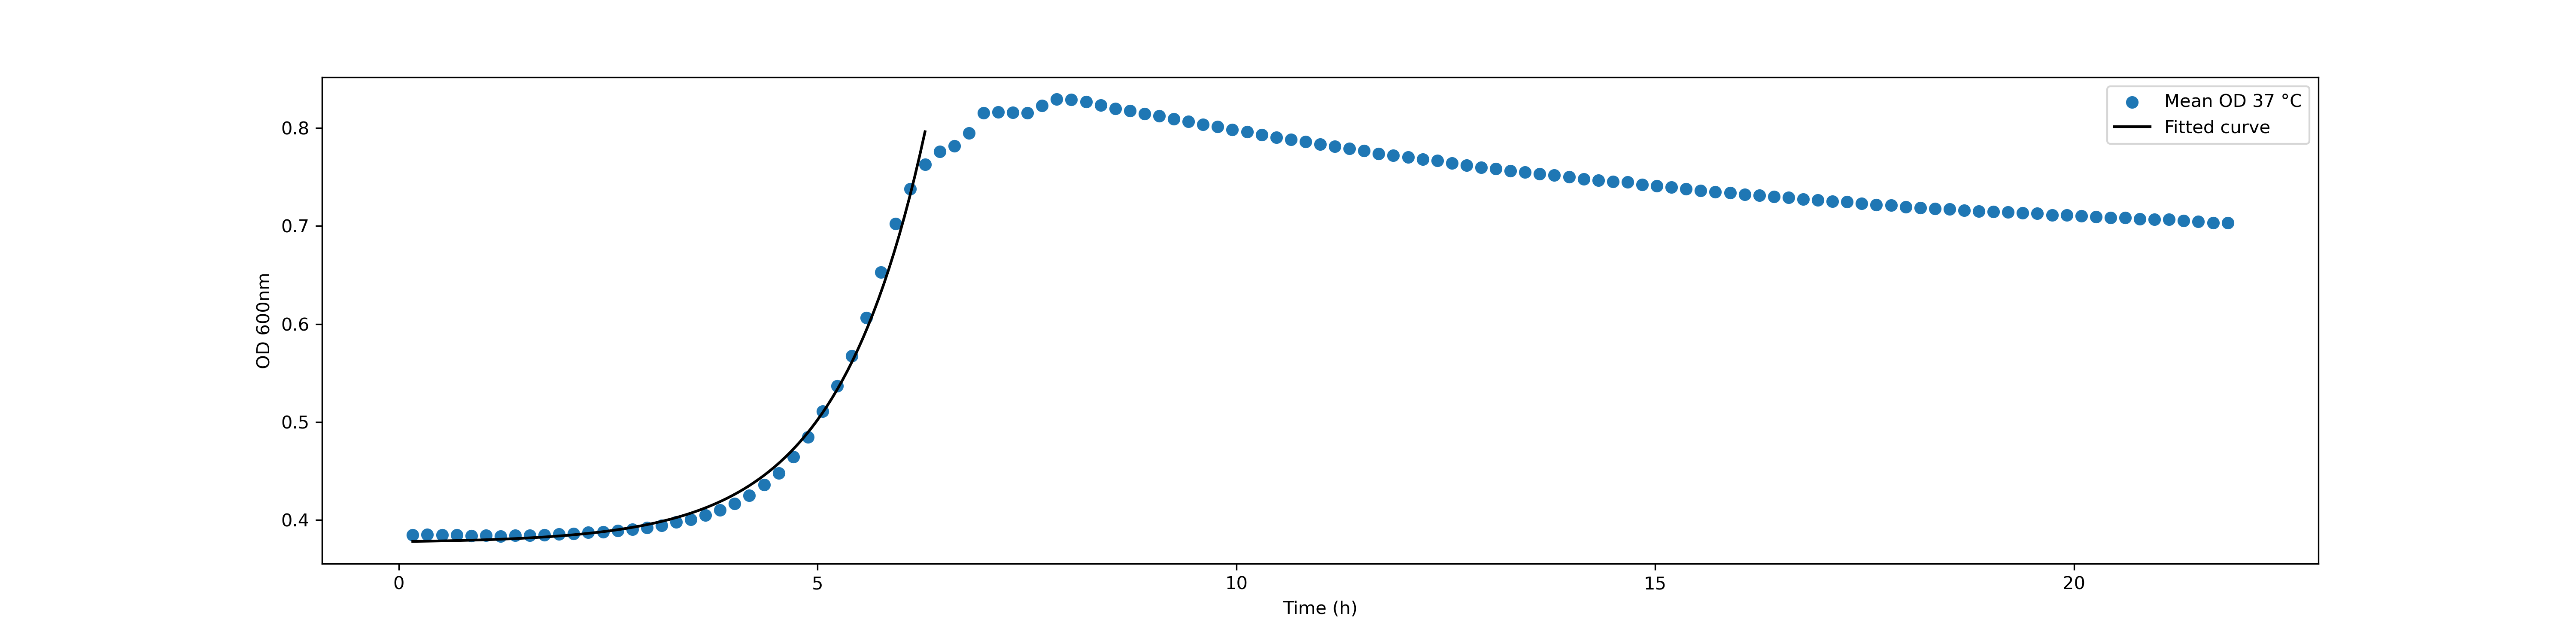
<p><center><b>Figure 4:</b> Example of an exponential model fitted to the lag and exponential phase of the data from the 37 °C experiment. </center></p>


In this data, the end of the exponential phase seems to occur around row 34-37 in the 37 °C data. A piece of code to drop all rows in the dataframe after row 36 and save the modifed data as a new dataframe could look like:

```python
df_copy=df.drop(df.index[36:])
```

(Note that this particular piece of code only works if you have kept the index as row numbers (default setting when you generate a new dataframe) and not changed it to be the Time column).

**(24 BONUS) Python task:** <br>
Plot the mean OD data from the 37 °C dataset as discrete points in a scatter plot. Then, using the same data points that you used to plot the data, fit a curve using the exponential model $f(x)=a e^{b x} +c$. Once you have the fitted curve, the parameters of the fit to get an estimate of the $µ$. Did the $µ$ you calculated using the curve fit differ from the $µ_{max}$ you calculated using the ln-method? If yes, why do you think that there is a difference?

Hint:
If you plan on using *lmfit* or Scipy's *curve_fit*, please remember that it requires you to provide it with initial guesses for the parameters of the mathematical function you want to fit.





In [ ]:
# -- YOUR CODE HERE --
# ---------------------

## Graphical excellence

**(25) Python Task:** <br>
To finish up the work we have been doing in the notebook, we will sum up some of the main results from our analysis into a single publication-ready figure. This means that the figure is ready to be used in e.g. in a scientific report, power point presentation, or conference poster. Reproduce the plot shown below. (Seaborn was used to set the colour palette). You may also make improvements to the figure if you want. Perhaps you find that there are too many curves to plot in a single figure with these number of colours? Perhaps you want to split the data into two subplots, or maybe even skip some of the curves? Anyway, the resulting figure should be something that you would gladly hand over to your supervisor! <br>

Do you understand the plot? It should be apparent if you completed all the previous exercises. If you are not sure, please ask your instructor!

fig5.png
<p><center><b>Figure 5:</b> Main results from this notebook. </center></p>


In [ ]:
# -- YOUR CODE HERE --
# ---------------------

# References

Katipoglu-Yazan et al (2023). Data on the influence of temperature on the growth of *Escherichia coli* in a minimal medium containing glucose as the sole carbon source for the joint computation of growth yields and rates at each temperature from 27 to 45°C. https://doi.org/10.57745/GCKG7W

# Suggested answers to the tasks

### How to get the answers:
Enter the password in the next code block. If the password is correct, you can execute each of the code blocks below to get decrypted suggestions for how to solve the tasks.

```python
fernet = Fernet(b'!!!TYPE PASSWORD HERE!!!')
```
Note that the password needs to include a b' at the beginning and end with a ' .

In [ ]:
from cryptography.fernet import Fernet
fernet = Fernet() # enter password here!

**(2) Python task:**

In [ ]:
task2_encrypted=b'gAAAAABkmargg77A-IUDrcUvYmmPNBc9-laeESHOAp8GdrE8b_lf9gzo4hB1VOfaApkc4ThxG1WeP13h2CqbPPGzhtQhqvYybkwx5uByxmpPyDOI1T5zs4lmzHXCXPoUe8Mk7IBqLyF-wnK8JsOmrb3SKA6czHK6rvGucsH8AKhyf7cphnj_kwxTb2PYNGSgiYJum9v2Ug0zda9ZTdE47GSGFGg5Ao6gAq5m78gGYThVkY_Ibw6fJA5Ezw1TZIR_-z5RfP-XuVTCGIfp1mACb_3_mIjqq2T1Eg=='
task2_decrypted = fernet.decrypt(task2_encrypted).decode()

print(task2_decrypted)

**(3) Python task:**

In [ ]:
task3_encrypted=b'gAAAAABkmargLwUkfjyvskh1U3j24f2rHqkS0rcsG2giiK3a4TRl1l6caLKrnH-anc1MGmX-uZ1ChiorusK4Bemi-7k2fyDC1DReQnuZ7I8T_NyAJLF__7tX5o6kwYpKmfL7X6mkoXG_aG2GVxypbzMLo9-7fzmNow90MMsOWVN-lyqlID6tvyy7pt0sjV233AvU0jqpPOHgnoZbtiPwFnD-NgnDvTKf8UrUrbiURyrQJAVS2rAQIZNxbB7Bw5dk32oBsj5qzzLo3GNfvnAmGki1EqCrUXFhXQmGyx0w7dzG8Zav0q3pJKA4EueIuogx-xWK4TyFp3MW'
task3_decrypted = fernet.decrypt(task3_encrypted).decode()

print(task3_decrypted)

**(4) Python task:**

In [ ]:
task4_encrypted=b'gAAAAABkma5VFCL6S8uzcFevSysi23iEj5smuh4yXrvAC4lmE8c90NSPYf6lZF51tvKNir2zXFb0q4NMAdnnda29RwBsAtGz10W1ZTWYvljI27PYb8EG09yaojlOUPYU4ZIVokfCHyliSrG7sARgQHVHuu4Khv3hrTKXFuskNyx2NjobL83x3AmBfwZZDoEKSdpbqUvtWsTPnxugJBpM_DQQKsXCfCSJV7_ICyjrB312ABMgmRDfP86LYqFnmoSgj7Y_umfqCKANnXDD6A1mD6wtL5YNIlXGXptCV1Ot1pF5nhCXvSpGaGJspDJd89CJ40mKbXuX0gOAfeYS2riO847YDlNk0k1ouKDqSlDh8DgUB2OUNZT9jIzdCb7HC8vmwccLIPjqESnSSaEabKUf1c2xJ6RTrQkFNt6As1b-wzBPW_MVN1nuY-3Qo1LzHVFGXJ5Xl2Lnc0onrAv4BdpdaLnkrKd5CCQwc6ajXRkBzThVQ--as4mM02My5s67JCJ8t7HJrB_aZEiC75aBzqW1ra9cMvb1yPRPOOs9zzgXiw8QZZCy_oWcNZtH3vGUDey9eWCOISVpoLPa'
task4_decrypted = fernet.decrypt(task4_encrypted).decode()

print(task4_decrypted)

**(6) Python task:**

In [ ]:
task6_encrypted=b'gAAAAABk_sE61qAH0uZ0uuqZqC0G8Wgk3LssM2TtaJwu1FVy5-8aLr9mR5aFS4KTnyYA2WwyS9irFn03jSHebzvSWeTWVkBF170LdIcoG0Aaw-VbV3pY8VCW_95VtYRszvpFJV_P_T4vUAIpR_w-nyUIWxiWwUhawOJULs34Cpb8RToBUib4yHiSj82nRqsoW7mQEXdfK2Wi8Wexsd9U7-rA25jkaqiJSs23n1gF_AhvtvfhrxLLMykw37yVKgL876X4SCd9JzBltf8r_FdLbbYv9bQgW1g5ECfj3QI59z5jg9_3M4lqa-MI2o4qEZ75yQGhSJ9CYr7OHvfJFdoIcpcdQ0oI6mvxJkcKj4SOrlDCa_NmE1kGEIu0PGig-1JXEAyHwk8VZ68gle017JgWSnBdRChqz7chB4ukW-z6-8bV4bboPr3g_uErt6Mutnp5H8TVe8nRsyc1WmjQ9HFpeV_JOqMvOvf3hV97StmWGJUCMQAGF7EFB-z7grg1k5k5bgOB4EAn4J23vOhaSTE3LVT_COOFRN_MC_PX2bcFDSY0SWC3hjpvw56dwvl1EqDtmMchFmUZYz7kbeqp3QNjcQsgIKt96JrHDEnOfD1X9p6se8wbuTCLz2F1kyk-HmH5T7mPnWA0HtX_I7vA-EGwA1-V8LGvoNLLEAoafEhbxIyTagF0G767kPiEQ53z-YcIV1yIBIbqX68a-2KqmHhANv6i_x7vwi7_AFUhdsHnarBhHCCsf93EtjO5PbTHGPORXTQq4qo_RJeEHOwxhgDh1FEK_wIgGMnB_w=='
task6_decrypted = fernet.decrypt(task6_encrypted).decode()

print(task6_decrypted)

**(8) Python task:**

In [ ]:
task8_encrypted=b'gAAAAABk-xzejo_jdKaXpXxr9X1UMkWmIwMxVqXEVk10TD1PIxtpo6uWhfZrn3Vztcx-345FP5HISehzkvSlZr3chiXxCkYy41qGhuEie-JWjoFZoWAD0QmkPGVdBMoGKw_eKz3F693nOUKqdnk5mEdf6irxJAGhMABixD1d9FXfunqPDjRKmijD9WSS_UtX7jG4JD7d1ouYosNV3qhqhkeCfLtCMDKZ8UZNv12ZXhmo2kfnx4309TsMdVnV5y6d4ePEazf8nGQPvKx5IhrT93I1a8R29Daz6poxWY0MrsiIb8GoJLCB6OYEri9hvOBd1q0YDDFzswNZvYWulnCE4p435h6FPDqx0wisOdVLC82zSVeKufP8PjKVkNPBo7vkNOV_9akW6GU_FsDngePDeEZtkjt96UZs-KcJJ3TAxULd4qHic6SUOMQC46fVorRxy_OWg3LZXT6Bp4-6yF9se_MYpOP2SheG8hmR9wtiyKoh0JlDrcyuGcijR7qFOoUXvcCbR3-3OznTFZ5JjSCV5vHo-wOPp2aU2Z51Isa1tO7UtKnXqJrDe0ai7FJqane2_UVVo_33G24HQP06qrtHGCwZzUArp7llPJsqRVweXEGuwCeS96nbl8-vEQde7XDxjD_a7ERZagGHuLsEgjBlIRiRRZZDyDxpxsxW2UP7LTx-pnCHIum9t1w='
task8_decrypted = fernet.decrypt(task8_encrypted).decode()

print(task8_decrypted)

**(9) Python task:**

In [ ]:
task9_encrypted=b'gAAAAABkma6-VCr3LzYyFRh0uiuo2PjCE-QC7AjUz3EPTc8B-tfvtXSlpZl4OSdSJolLBALAax-3Auh_abRqJWZ4i761rgEMzV2fg2LTu8W_bX_I3U1Z6t9L8nTv-t8x5W11WvRlhx0_QQB5q_6VZd13hSyRlXnPFDfKF5X270gJo-x7RVZ33OK9pLl3UNwMexXROGQiCpKHO5VvZVqOAfKzaNKyLKtAo2_bqONxupqRcrOEkKGchfB--GLbxHSU_pbAsXhJ7Y4I2rs4t708Qs1QHVmqMfaTufcUx9JnKQ2CH37HsEPvnio2aoy8QvaC1BxDVWIopZH4zxdlp60LfqkzPBETxjBjahnOmxT_M1U_laRHwzEgYGsLPmgHKBD0Y5t37UjcLIDXSkucZkLQMATJgzMfRdEhiocbsrImxoiBC9qRCmny1uZWungSlZVZ-yjyNOLGicMmw7WJ_V5DBrhn55WZrLtI4hYLQgtvattSIOZT9-Gz9yrvCRfZZltrVfZDS1z45DpeUc5fFKosQ_zg1S7oCtCyzy0JUPNCd1i9A37-2zTTlgK8-LvWU3GD_06biak6Xb87pprZZiiUKSJJnQcMtLEl8n_24bTs-FKEMF1WwCjeKGP45KrTuznlsrHhdp7EETda7KVwAkUWy9ispY-g_OaRHOwtG7GEJRPfykO5RI61cuwXbEFnDrEEmaITrVbeRfrwaxa4hkADtZaP8E5llBqdSb-p5D-O0B85hXCH0L8tVJ31FkRQL_TZWYaRtZh_KbL_JmB0BmlCstNQziB4l6uMh8Cey4G3iI5kLKWJxQ-Ub3gz_aXmNeTwx9VCZhMI98lozQpdCpYwhgNn7motE28dnYDZ0OLrSbCNjvzzgR9K40kOqsytJoM-0GwlZ87C6DROZyd78H5pxsXfzrCsXQGV6nEgsm7AEbRvPWAKuOkkQ8wFlCKN8FvHrCvZ1dzFnm99B7kpx4sLtzIWaylP2uY1os9AN0-s1DtfEdSz6jQwMR-zO1XMQC0934M_PaSfaPH49ua_SdkFdHk5xojh9E2HXA=='
task9_decrypted = fernet.decrypt(task9_encrypted).decode()

print(task9_decrypted)

**(11) Python task:**

In [ ]:
task11_encrypted=b'gAAAAABkma9f5krh8gIvK_XeCzL4xlKXmr2_pxT1e4lHdtNjfd5V7JQBV5xgRYd4dAO2p_TyTNsD0XMXAN39yEZvo56RVScyHOdXKNbu8_jrtKov46cg6ZauqpQXob6K9HiDzuvh8UKQ61fHrbxJeSZ-NK1kg5wLGKDe-BC8N0TRS5hFQUvp9A_pfF0Q1JNgI0EYLMMI7qsV0rGGcJP-Alvje6kWV2HayyBWoy7mXyK0V1MZblh7aWXL2GR6sgmvWrOe1OjhNrAJdCewvBrYAvnuGQ7TlJUevmNnclFDDG4EVa9bgYHEtZxdXsPobNRW1GJ0sZcF1mq5IRk4VEMZHmmkN7CvSgelnTdfBcxpB5qtWpdr3lSQKdNzVY3VHSHY5QlP8EYneVHNxWLObs97u6tXibweTxW3IXr6w08lCxy-6wh9qP9_vd9ZNp9zxgv8Tz2dpK3SPCdfwNXpVR69wxjoCM5axWXX0L50rCLzTfyOY9DxlZmzE4BXEzw-5y5shWu-dFjdbW0FwTCYvePPdjdlcJv6TdAc1JCb_1nseIzD72jZ9rMpeFZwBPn52Yp8uI912Z9WLsOC'
task11_decrypted = fernet.decrypt(task11_encrypted).decode()

print(task11_decrypted)

**(13 BONUS) Python task:**

In [ ]:
task13_encrypted=b'gAAAAABkma-wavd7Y7Q2ZMeqwDLwJJVbQqbvpXz89c_U-iqKBOHgKMdeaGeJJI25RJXt-EnzQrBauB1FKHfhCP2BFD7Hs9SZ85pzTncjo8lhZ6gc6ZLuOTM9gkHpbfe5SLcF_H8x-9fFzbpqFS01FO36d7xbAVmyJ42tkDoJYpbDVH1tiuqjTWRWdR1ppnzcTIRoKRcaASGGHYogWVI_ysElKljj8MMZ2WyQfAB5XovNW8VMKLsOlP5nUUrRNwGBuXpfUFjBhf_s3tRt4KlI9j8O0f3Oy6rb62ej0v1zU8CrEfLpjavh7Zvafr4KLLNr7gbQVYUOT6tR1gSx5cGVwxr8z57BnAiyRXn4F3pqSBtNqxADvFmSADecPeS2SyGgPfBYlMh9L0zhWkep24CrEfPL7RLF2R7iHf8jdlMIgCxQiIqiFQFndjW0FxCLVtHGDRRx0vwxYC1ajhkW71Nz87elvOjBK-nUkp3fmCsv2MsC9oNPvNguxzMAmv4xGFOyhvwODgyE7dCA43y48i43hes7EEgqHolB1dRGO8iV77sLOZSIzHFXAfsq8MooQNAMB26oMjldaODCgKjAC1bwAyossohpKtlT7bw0pjGVAPFqwSp2TrxcD0qLJFTdiIwm1qUbRdyCHwilVPtpt17mhr-7VHQEBw6ImbAe7FO1nN8L0kmVzfDaT_fRYXSWNxNF2V3tMs3FpfojTGmUF0ImVYgf3sOXL_UzoXYvBFEm9z3ud6bDhehYfPY5E6MZWiz7D-wn6tjzrx552lb7Qu3VHbkyFCLVBJjF3-VyAx68_1-Fqgu6bDrKwYV3QxUcyfSxagMNjTCxPNfjXgd01qvAPbwJ8PDJwjdPBHdhsCa5czazr3j1M0Qfn9WjFnsB8iCpFwgBPmVTcCu_l4lqum6mq1jwNkReP--nRh6uacz2TMWqA5CZMfiWZ8a6Sr__BvbHtNCf2Q3CYSd49jS6cZvetUgwTLXsWU4OKzwT4MLc4e0zqXduuP8KBETbGRzdfkrMjW86HddFjt_rnYXzXRFCS1okLKpU4Er14kf0EGJo7XnxOvJ1QWzUw7gkvLbi0e1_dpqrkyuJJk8mPYbEQ9ockRApn1nWyXSCC7UrJUTpxAGUhH3iVsyQxsbWlCUXJiqaajwQKbhIESSE8dLlUs0Shz6DRNIvVwcIiru9Oa7QB9AQm2IRQgat9xf7FOY0JDe66rUdwasOxGLupclVrask7f9jiW7lG0Sp_zMthpNDSPee2Q7cffiUSUvEE1zPvboCEgNF5Sf_IUqj6fSsvlU0BKGPhjA8Z3pwKq3w5GRNh1ZOGKwVLuJWDjDBDfce9qwMWTnINbl2DhPj17fd9Q3FiAdqyooPywUTnrvAn3Cx7GllehPjtDWI_oG6MBNfeDmNtASD_SrD1xzNUzezPdP7JdNGNIzo2GVSI43-Uea9AFmf8Lf51IU84zQH4rRxSfwdHf2FHLQ_wY4aUp7Ludj-Ce-i7Ee3O9hSnmhINBgVobzJewMvoHZWy23D_9nqza1liZ5Wpd_q4DovAnpvFqYDRWTF39ayai782v91ziOzYq8Tr3Eg7Rf95HiGBG35ra-UTNKgSB-x52NTrgyLgSVbZO9BmtFM0kEbwP5f9o8pVgqy_oBsgVfUFBnA-O-Z8r1eUOB-GIGXp1VJJadgN0n1qw1I-IePDtJ3hKuzEWzt830wTgJFI2TAKzcYx3gVoW6AV4sGgCHy3v2I_JfAZOYTBaIHbE78bicizkds-cwcanu9f90wshZn5SDtnCvJ0-3Jjji4spdllNVJqvj926Zu8_nMKhbd5BVTNhugtB3drhkEDHO65jnCWlXTiaBgx2NuQ6lI6UCQ9QTD9ZC1BhEpg5Bf5zE9hco0dyOAJ_97DIMpK8wnC6yPlXey_MG1MpVIT_231CTH_3ye3DpYkwafLkTdUwaP4JSC_6_1NGSGzaEzdgi2g8xKl0XyciyVbTC_IaxET2YyonnmolB3T_yjCT0GHaLpaZvAwJHojueX3nOZNIIT4LNk5sRb0Df-uwYjVOoXDyA3oapCvYs-XqmaaMS_byDYHUrP2FV24hmnBqysmXkmznUY5mexZpQNl186OJkPqHNaDTIomBnQq_TyBESOuei1wNm30mSLKqG48ZkknactCBAuqpLLi40YKqyDQ-rKi9ow0R1GuOe2Ppqgl9bvwzHwrcJwI7N2qgoBf14TzS0w7ZcCTcRpNupwU5oVHRMk2QUx3pcEV9JETghvqLTddwfrY56uRasgzrUsHqhBsw5CVw8uHaOSgHyjGYO-3z1I1D2JasasPJwL2Hhaz7Jxo9UARFAu1QYk8d4j7oV2aQitQo-iBWsI--l_GhvxM6Si2tWgCEEOZPpifpVsZVsG7qkaZl9ZJjchzzJr0VZ9OMuLKC3Pt6i2L6jDordZaxl1PvVPtKh42P6PRC3Zyb3SDlnT8F3WjzbANrn6XqGEOwJAafY27I_gApjcU5pNsrwUhCh5iGpKAI1o3XibLAgnhI9ikyNQQRORICBGCPd9mgkNNrXexNuKN6U6a921s1wrnOBrusodURoC7Nywgt5-MSFJn7WUrGON7cbfKnxaoGcDlLwpBConPm5ssgR7332fs6FKReD9QSZsIYNEf3D9mi-ci_d4cFOfW_wz5Orc4yPR45hRHqGdBzYH6ppLfIDCkFrvLSfwYDGY49NZehzhQ3Jj-8llrzTDGPfIJTATJYIZc8EZNrU5XyYIIKtnBJZcSIQ4nsIxX0SwCH5lXvbNY0DDcTsJq8slVuV5_nIOFlKoOtiSjWv7JGRK58AF0akPAwLWoshwkyAqwJS7OeiYFr1NUB1FeI-eCxKjC2_jQXOpgAOZ72RjJIWYc_pT5zIhIqmow6rzK6KuBMyGuHGCWuGdIsOVN2PGGj6lqwLwnFqFuwM13xWyRWuqgWs8QOS8j-ttpjajCSnVAOVTwWOODY0iySerz0TqUZsNmMnfWUSIf5XDl68LxcpI9TulmC2GSle7PemfwYzOjmUbNUyxsl26KG4J2CT43pqu7uhl8oL1xe9hrJfbNzbw8BN4i6GtX2ygeF-N8roQxLeuRpz2RKa5K20hmejDW99sPhkslL2Yw6gF_aLNHR684TzMKx8fqsvVP439BHng_npTsMGKFpNsuzygNSxvwXId47UVyFziQugtMqIdAS2l9sjS33kE3Is7mhaaBEY5fKr1_XUFjVkSS1D3Qp2IGnopKWTGyOQLlsApCdtTV-hmhsdJUosA_mZiUgiukSGpLn6z176vZxHqOLguVpMWIqjM5ExewZMaHEh-IhKvW5PbINMiScQSRujqv-4qMySZ25ldod1A-Z3jZ6TDp-PF77Vz_StdbjHonubbhqlEQ1UfngDKIZ8QqI3iGMftEru09nW7uRVJJKZhhcVkLlycJ6JKN86J2CabxrpyQ4S57rhvNxeNtE5N-xgnBx_oSgMi7CaLrr3UmBy5IXW3WdQk-CC9R70PqHkkvqW-0OmElldGPn_riZi_lq2_qaax-VjomWn4FQPMBD1wPEtGumtXNfrMidKmDtyw-WROdkLbE0KXmCgU9Q9z7lQNZ3PS4T_c36QmqNa2KRfKZBT2qvO4BztqYqMKBUxIf4vqR9urnZohbx73MNqmW-gYYZXJqbmfs7LN9qG1lNPXssVoXbE-XoKZR8gJ1WKUA22IMgr7EULLB2sf6IOaB5urgGUhXjbCY-hWEMII9EQu3yvUkXJXgCvTJUqWlkOljEXd2Qoq5u4oFY9enDCas92bbW2zxVP74l6qZ2ZdLzf_7M56En-SLwnYVODk8zJLUSYW4qH_dq8CQAksbTxqGG1ywn919bNWHSkd1NzhPRwRprYxNM14_WUHuwL-4fjn6aQZd2fNKos0NJ84cKvCJq9_KoXjH7UFOb399rnnroTaPLwctEzeRTD-vf1kduCpbZMwh63iBLlG8z4gcb2PjEbRlioxXonMx2kg-OgMVt2H2hbsO9NscSsV_oWeP4N7l4gRxk7PjGx_VklhfyoWYidjEPCyjgut6TqrKGFTZBopQzTs9BAoXRP4vM_G28Z7meTFQ7nhYuuHSebCHrVhOBdWgXHg19WsDvT9QFZF6T8qwlnv6Np7N1bHz4vWxflvHP6WPneU8A_75LQ9wroDAMrlK0HWmjym9hLOsFMlvjg0PP6EX14Mq_24T_UXxe6nUUm0p9ChNr2drQflGASrh9NAqrkeBWcNJ4cebnDY41nBfH-CrkI9e1NyVjjtq-AwGzDZSbTX4JkDBO7SxlXHgn4DdH1fAlXYzGHyazRoge3o_N-lTfrrxQta567sy-eARFzfprxrnfJmfOEYb6v35bKfJp8JRUQhZMoHd8xLRbu73tmJdJFfg4oW-KwBZYS0tpNzMoJsjvvGq8h6G1gTjieFr3sSr16wdWhBcmPGuBEvhd1i3Qap7-XRPT5IEkgg4BUbYJTjphbzVXLHVkf4vmWNuT1dR3qneDYGL8HYED5iQ8_1X1Ff9TJt8d9j5aIT-8OP6IUnRbop7wNGK2ru0MkaOQpzZ74AKTPKdKNEXUymJdgceQEFHQKLlhc15kMeQTDXkj4r4JhhPeMhSU6fidX_G2siMA_QQiBfgR5FrZa2mm5CXuR9VNteTWeGx-B-NU74kmsJ375m7R9toIZbdL-mB2_njibkfaJV1LGxnmoJeuojhoPBpy7dQ7FEJvOp6S201AQLsv4V7Gktcbe1feH3AOmWdMFZzQDkfFcQdKd2FWzz0w5bDRKZdr4dv7enMXTLsKuL_XGnFdIDcl2e9M8NPTSmQ_6sL1WvuykVFik_xYhIwj2OWy7MRR1chWHYSuV8srD_Q4FM2-yyqnvS-8mmC-6klgOeH3EglaZ0NZelMCEC6EDu0_C56LYZULbtua0WNgboaA9TypZCCVhun9pCD3az'
task13_decrypted = fernet.decrypt(task13_encrypted).decode()

task13_pt2_encrypted=b'gAAAAABkmbBPbguvqtRsXhe0vSRek3mvees_nWK1zO0GE5HLgHZMCmw8e4Nc5Sn0QaOSdcZaiA40crErlbKLHXkbqJKXw-oIbRsa4ESn5V6xuctWpYbh8pz-oJizn3x2EVZmZpJz1GWRtsRRd3M08ENoY4ytMIJXPMEHZ1eUDJPJ-PdlyCm3YV7VgWP_0gTrTFuZwaL-JrpopzqtGF5W_CSEGeBar3k3G3Rj60cltCIoD9Ro1Dwry5v7E8gV6q6W01f7KjMonmhoLN8nHMorzsnhChrzSjIa1lVEZEjeDt26l6KDbaow6IRzHCS7d9tPD2NghJeomfxstiKSGfrRafq0GE-k8x_dX3Ye9No4pJvylPlyE9Dpk-3pPFmHGvRiPrJfk3nPWr1LG5Gug6xANGUC3TjW00eSocN1FKGRvjo3ORTAEsmpF1U8RF46YPodwzbYPmDp4Ut4iRnMZBHNqtL82CLBDSR-cBZgxJHh0vnZTGXoH0A9nXFv3Kj9rJXAyoHFwp9q15SyoNSOil8ufuuEflMOGX45qI7A8cdDS4ISe3Fjm5Tuz9JrZbSl-JlZ8ZGR7npyMNvfOY-JUw9lg06T4YhFirZYpsW65FBALcPWki9h2A3uVg9Yc8tV4P2a5_cCvg6hxceZEauJ5ptA_ws1lCcghYi7wVLTlwxsBTOKDEc-tKVuh8ZMnAm1a9gGoQqfv5jXdEbOALnVqJEY_yyfaTGoZX2ygSOzny8RMxX6x1q5YnUY9EFthR8Vf0T9OuTTaozJkSCgkFcvjNCLFLwq41MEvaVZM-wawzNOjApDFA8DbUAUDkQsphrj3O4RPRIviNnuJohbThZ9HrX97aPFkVFMJ5UqWudbvnU0lTTSgp_2QtVoR7kbodkRPplBChHjztRonbSzIb9dd-0Lo-Z7C20JeCDgIttSxx6U9XRDZV-vHPZyWWUR9Cr80p8QueM9UdlTe23PyFdWwyP_9BSmHLabs53yv7N62cPBtFhPWCGDlLqR9akq66aSBbVIWVcqtCA-Tvx0sPB3kQfBhwGdk2js1US3p5UZnO0NxoEUYihsHuSxs9j52CJKiFNNt5Alh0ADdVkpoPQ76QFkLQKcLMREJORJvtpv3zwzEqBuAtfdZgGdk6KXHwT9JgT37r_IJ0jxzTXUbfKzEKDR4t40Ds52O1zFKCePQezQZfMaD6iFMyPJfh9Nx00AKM7UbmlxJXN1jQAO0DmoNIFdcmJpPuS7Q3tuo6JuYMU7-bIlshE467WlF_Ng_5CxLv4qUQs-dKolpsKMxQzTMdpjoogMhd0UjWLdLue2w8S0Hf_PVqCZL36Fw7_SXt_Xeev5kopUZrnaMhp3o7Yqbul7OwoonYYc1OsatTfT8AoHMLbrqOsP9HQX8PPnLXoYXk58zmnXB0x8w3Bz_HSBkHzEaopyXDBnV_bqmy7E0K__T7mYaV2iaoyFob02abIdCHLcNxRYptHljUlPYqb8X5rOP_65qG9pWLCj5gfP_I9o94OCljSSBQR07--t1JXrD2iwxw4UdAu2bm-eSLq28adRjheojnN5j8y86tUZG27ZSEl0kAhnAY3hnpa9Tthu9nCo02QwS1QxefrBQENsnomeKEXtPtzVQckndN96Rr8Wh9HjCdyuX64BsFT6LhAXGffccSOPsA-Dx_r6VUKFgqESPbREC7c8Gu-hIVr6UeDPv2a-MBX2bRAMxq8VGNcBAdamGyQvD8GgNKRMqS6x1EcxP6IYHUtgCHT16B51h8LdnDyolARdWBepfkMyxbYhdfrIlb2_3fR6m57xRogEBpuCM-MiwjyJkEAR01_MTtCkBRHjs64S2lfxo6sAeIbURmlFOyEq-C2ZnEw5X6aQteibEHYl234xORyuCc5hEemQrjSpUhdMZ657TtDoQN_o1LJLBBuCJ22JWIZNNkHBwY2ssqYvYZB-JBwMqOyQoP1VX3URFgEdZpGG3XC4l7vQw4_UAos-xkJ-lUPYC2rRZQVG9m7m0ctVZ_Pl2LKOiXhK8uir7i1f0Wf5h3XM_9LsIer7HYE_n1dqcZ6Pn0r2ROsKSe4z0wV8skciegUJ9edYyUJ9P-xYMSTQXiJOrn1xQcl64KrSP75BhDXxNi0xuZ9GZqAX1Rs3EiTK9-GwHD7ya66GADChbnEGY-b-HJIrhcQPGCoaunYViEC4vz2FuNvefy_NkUAkDhSfCmFDVxMmHNtpnjS_z3-cL-tn0rJxTxzLnpEeHEeTjVTC9R3E3QQBzMssbH7cHfO3EAXwV47zyw5EMwz7aQdYtOMa98TZh7ZMHSRMfcVVUO2us_bQ0K1ksS2oX--EmJrNb5B7lBtoJ2OntBdFjqKw1Qh_PenGnv4FTAowxXwQg3_v3vEFo5HynsnbAMCsAtGhGSd2bUr_ZIERhr5UxmapANVdm67fDDUk0Tw_N4awd62vSZloDzPUDNFroBzxw3a92o24GyhHbnoZ_LUTq-wkv9kCWHWCeUZnOodV0QhKwUcJokQf1QapOqJX4YQuEMo9hQovo1Xgzb02Q2a5zFZEWOe2ggeYF0qjLQ0m_w5GPh5O863n7TTbBmya4gT8R97YCggqxnnnr8y4EbRUFf1o0-6blzIevaYLEzOmov-DwGoYjSGxm43T0jga0YuZCzi4aWDD8cBiZAKwsOeFr7S6jDwkiIjdg-7eI23ahPBblEN4H33uedseWO3PmxRPLMKB-cDsN7A5_p2r4PVUvA1lvm3EVnDGKLc1MUId9hiJfTQ5z5ei2u6mmvS3iUMZnAT0oqoTRZJBe1IigmPw4wUkq1SPvsztjab6gyrYNSfZngS_g9qG94qerA-COsfrs0XZK7HTHPqIJFAC2oi5UVna3ysSdqAMve0238EO3HbDEpkDk26mIor0ojSlY0cBq3v6td0s7kSJ-u7pqPFYBw5kUokH9SopPDavTI7hcISDbLRNqzz2iqbPR53r_0CNiEvIURpAhgz3R1-kL9A54S6qydH74Pxgzt6vcWl-KGyYfKMCEpcqTzZVfKoii2v4UBQz_xl_3oAxv7cEHtwAUSYtOjdk6UfgZetEGyIrRTFQODatDTKyfMjS2LVEY4m6JxIlzJy1iLJJE_Z8oUqWvl1rv1AU1HBilz5pFFWHmLxtOVhZ_yW0-I7CE6gnI1N5MJEt-okIr7_Xp6w-EtVR07iq9lUq7y9NbN0NNaQ5PNuNZSjDrNwN2uRWyK_hWFcAKya4CzmzFmNtcyWr2MbnYBqpuda5z8D9Tr2vfNfDjRAsUzHL1rjOh75429RhN43JDYTo3-BaaP4vhzstdkDiqFBcIEQI4-PVr2XlE_-jXgEOlOQpCzRswlc4VcoxfY38huJftUkaZ3T7Sf1_exydyBlziCZx7Aky02xgxNrEzJ140bwAPWQ_JjovbhDdAVUThEHRY0FbjdR2jX-kRViDHavDq3AZyu9lqaI2fIdiFnBX2weV-vEcQDm7ZCjtZ9KWPfwkdjrJs6Dtg0qubw_WzyAr4MBj6aZyTJYPuHECojyGI8-HwqmJ_wOMcXGHL58a6VsNOWAehWFh6JQF0ox-dyx8zfXZZWj1ykX_EieU0vc6UWubqUZsuq03I0Dkj5yKaqgEB_Hsa_eagcNolBRbNtH2ODp6iVfIk6C0eUxJulmdq596LKaGj_trFurqAYSJeFSsMOfoVaAFAXHVLr0uqxsh9ngsoI9lcRprbVd-CZCheVjTfIWm2VQapGF2gDjWthKgw60_uPrRxPWubi3oUvEYOhxTNkOFBOa6i7lqf-RW7VgJiu3Aa_8Vmo5nGUH3lFKOH6mFnLEL0rgjzQBqPo20cy4hC7eshQ_WOdN7roTUp9aKi_H6-2af_4KAQsy3nAnj1EIwSgpQYcx7JYMLYVdlYB2kTzozPSEwYONMpIJsp3HRW7lhyKtCdncdbUJGsOtvMeODiFAvazyjy_0rJxXrJbc3bR6xj7IxHO7SQDgE9P3mNd1bfr6hE2dUSZcXBNeW3qzdsUc2YMnd1cQr1u1i3vemq1LkckeYnaSYhH3v_cuWwgg8BRIKZxga3GEJWe5fN2w7jSUlfqPm9bgMKEV2IMshDYUmjKYKeTu7ikBTTe7xiCXnkRDBw7Typ00-jjU0-Aj4D2-0YssZ97-CjuJO1F4hF04TntINQY7pw8-ChNJdW6zXuSJWuA-VFkhn4CNrHn7Oc-Q-mx74p82Xt8joW2wVfYYljzUayDc8-NfXYG_RojPxwrKYMZeGPOtlWiUkKF_lPhu6xK26zIXt5bJz5flsOeZOrPzqhArhTfAScbtKQwb_jFnywWX7ji_7nfTmW8GzfQNWgGXa51__GKJFezM8UcWjJNlYkAUlKdqoLe_HbrJMGaOadKADm9LNv6Sw2JnNbSzBAp5sQsuyaBTao3sNICUqpLGNiiyN6pXbhjJizEuqQsRsD3vvI8k3no7WYVUMZ2RCiapJpwep03utDFs_MmkvgDkUqGjz5lQBqDvDiy-dHhmQdgqveols_oCELKoD0yLeGzy3T44wmt5vgEYOMvvqHaciOSLzLIHSnl-Y_mflH24H0B-LzRavW9rjTZWOCq9yEtJwvuoP4PXcKj-nWS8w1uzIW9p0D825GBhT_i7w_aXcnprJ8i4jTvyka7Kfvz21Y3lnl6TQ_KnlA-gRtGu7LHHh3wScJ2dsodAGefOdwEPYIQWQEfCq0UDoi4IZN83Z0jJNZZ37bCuUnPM3tm9vzZPDjQgp8UyGuoJDypr2WLAmSdO_EdczcZsHtBHRT-W4G925w2ZOTZ1QoDL3ueSTfo7ZuNLHIdyMfU3Gzi78561Zya9IWrLIGLS1Umhj1JnJSfyYd2lG7t4AgfBYaZJ0YIYqMFpx7eq33DC4djvT80SrhWl7ZSUYg6z5lU_dSjDHGDRiQcGZegRWo2lWJZ_BO29YKCTfkg0INeoGMnbGTXh_17Sul9ZsutvVuxQ1g60BDqpJqsbyazLHFS1S7ScqBPQ9jhIqavP7fI3m3zpwv1_81BzeJ0s-ygqx40vlBnLipsklsmRl8nC35TYekbd6QtNfabe8IQnANvNYOBL5Dy1YJdKLBUEmOzMGAxJN-c4lzfPdDclW9To8hb2bU4AwszJ8R_md3RwVjscS'
task13_pt2_decrypted = fernet.decrypt(task13_pt2_encrypted).decode()

print(task13_decrypted)
print(task13_pt2_decrypted)

**(15) Python task:**

In [ ]:
task15_encrypted=b'gAAAAABk_sJhQzEnCo8mOwADXCPhm_vMrkiW8HDS_x2TLJ1KcWu8PizhBavYcZOB92D1IZQqVNH5Z8vA13PfD-QHFa1upYpFu-PKGZ60KuEUR84ldDhM_3cuapCVPEbY63hR8m3U54VzsEUbcccrJ7f6yKJVLbTPV6doC0HgfeYFwHe7RwSb56zkM7CwXpsQSdqZOzI1owes9QhvO9_PRgqCjYxt2kFHvmYhOlvqO-z4W9zSFF2Fcev31cr_mV9sIOpEdypMu_dCxg6ANkqsX4MRdU_qaFQpmB8pH856NGzZLco-oRWhpLdz8zmKTDaY9D5Y5Q2fdaIA_wlZpRc3LWLEVR5-QCGoG0FdjDILCiBFuVYurEjOkTAnqxC2-PUsb0jjBgL8wlScNw8tSa6NJI-B8Wt0wpd__MOQ68DKQVcHiy-6tEqWoFYodAt8F-MtauECB4fzvY_VmixD3KvdB26UlH69vw8q7iut0vS9jvIui-826ZhD-TS2IN_Ki2wnt7edaOFYnAXecdOqv2Wtx0MF8Vx2S5PYeKprm102KsQdbCO1wwNJ0xDAGf1d8Gc4Dma0wpdOkJP-CLDQPVDDQlJnB3yBuO7You9ilseAVZmK5E2a3U0zVbw_aLJ_7I93J-tn6b3NwmGg6bfBUmCsI9d80Tchek4_emTHZiu5NNu6GRoy31xIvIPH2MXhmbEXQDdyTEfHepZhNmwQTmssqIyzrUiXEXkWCloSViIwSQXKDHZS3fh8F6rcfesVtiZ95CS4atKmDQSRmittnwWt9EK69lTpieAbV1m8QvAqlJaC-vrr0X9yYnlVbR6i13fNTtNcjKj0UZsy22V5XC1zlYLkBFAl88DRbOocYXlnvW_tPzo6Pbz33ekW6n5JNfyH74TVL13AUvzLRqLNqKiVRO_d9QfvdfhOUXWh4cKCBcZjNEVBpuvnpZDQrqIz_9R7SUvqpSSFFdyHadAhit-mOam3MaCAwzaYfPfNo9bSaX15dXDS5qLoT-I6jg5UiMvSQwvy8bdZv5G3ZU28KyWGaFaynwWMCXMhOK5pj67uUNXe6Bsf7nNAjeU4szPsJX_bNDgRVhLgVspWCcNRgmLJIjGDpoGWT3SoEP7VRS2mBsicdMp1ju5wwztCFUqW98O8jMAfM_JCO1ICvChU-OOqyjFB8cdkL6_5ygIEXJ-z-kD4JaEI1ZSFg6SBmYjlniNk6SIWKgsFyvb_mrEsOJQk3qdfZS_UoPFii_KgZXz1zEms-6aeBY0c70GDH-e1LA7GpitT6vJgX2WLe3-d_U6sOzegsLR1c-4UGUBi4cOV6un0WB8DWev-Cm_AtHaVAXVap1J4AKwF9XQbD3RlcqLRQrFg4DD2qnY6Uz0B2KAizHlAiOcEQFxgdlvqAJbxwT5kH5ScHD-tXsw8AdYKcT5vgB7EmY7YpbPnm8di8G50LfYFo6k10TaRfwlg3Md-AS1za8-C9l9FCZiQHydfFnDjuVYxLHXZtvSaG1JB-CmKfws81QOQGNch4wNvKTwQ88-CllHmZdqXcGC2w7IijRZ4XKOwsAvSKGg40b5Y3AkMR6lzT9H-r8v0UxY='
task15_decrypted = fernet.decrypt(task15_encrypted).decode()

print(task15_decrypted)

**(16) Python task:**

In [ ]:
task16_encrypted=b'gAAAAABk-xoGkbuxdUvq1eKSWbrE9f93EK1En4YSUgkl92mIgJzL78zl6mS9s2fw_3lXHDbNemGJyqIJvMRcm3j3MlKT2L3uI8WMjHq5nMPnXc_ktrLfE0goi8JW7eTLYEkik7bxHuOeMiJ8dPPkUrk8D5qAXYTTXw6WOoyTWKL2cqojZNh6GSMrDT5zBx1QEsHiF8MwJXV0CpjFImUqJmbnX3_i9ov-BDW4dZoN9ABDraVz5nSHC7Sg2YkHmyA0_4oCgy9NSydERapWx60Vb2PXZ-O5pS1MNqa6-f-8LhfD4hIpWbeIS1JNo32uYW0MTC12WWbz7cWkktRsqpniAzMtS-pfGla60z0ii0mfm3df7BCY1XD71Zs7Y7jH0-vkKj7X8NoQZwCfVJGu_Irjl2PkYp5ZdI6qiKx6Llxy9dFQ_KJkHp6RCUVaF5hpqsVt_wpb6po3OLi0OCxZUmcgmD2pO06KXojJoiiyFYVzlJBZcGyJ_r8ambM2cfFoDU_kGP_OxvxhP6wGb6PiNYdhKfj40OydLaoS9APkQUdpq6wSq-ujsqt7Cu3gITu_lN70cT6zq7TSMpupT68qeXVOvAqlQruSzmo421xt-SrLeGVBGkO5wBvvM_fTUqBnL337rp9dC1IV3WElvWHRIei5ZLbQd-ztf8XjwpOCmV9A2FJl_zXbeM6qn43jynBiAdTfbBl3egYLk7kEBWWgQq3p_wOdLgMyId7bd3J22nI_qV7MmpRXvMjafKQ6twE9WfK9n-svE0C5e64aDq3bC-5CBiX6Rx4qSRXEbfdt6oKoTzVnsDbG-1nd0eCJd19dmlLu1JdYjessB862Hh7XbYgxm9D6MRG9jNsBQt739st6HPZ0rZ0I0dIi0BgNZXO7SKBIXsr5yYe5eTMcPBc7AOxwVH7a1Scc60tGN3OeA-pjmmN5KKyHhFtY09umyhNLGnayHUA92CW4YXo_QnnGn4Fvzxfbo-r7_wcC-8ekgJvoM-IkLm-Xm1d1SbIan7bWbsGHYHKHSVgKerUDBZmYUlcwBMHM-H926pYUao6uBj9S5QJM7yGcl7uWW8pl832sDcJFGtho_FdXH4HGshyoVOOERTA4DAc3USWzsuWMhU82NxD4Vhg1z4rNuKKjdPnk5xzDAK7A-94JbMSRlWCRoyklWbf5unOWJNzb-ePQyDiY0SjHSMC5NwmKaY-Rqb1YupmzgFDBu08wTP73Yay3GQ2tJrs-XjNyq9nYqvWsWYXRNvTD1d-tinaMw_K-OOC90vq02jrHum0Yt4Wm9Z2ONTA_txZPh8jDTI1rtwnmD2yPY0rwLy1WiiPQYS3DthfjsyBzSb_WxYG0v1bqQV5tD6QAZdVX8OFD9p3IJaRdgzsCqWhGiBvX4W1oLV7FowMXlxIfvgulGteaPX2WKZtxDCzEiBWsrAsb-g4MkNscZJ9Xa2UI8PRwVc5oIIQ7VFkJ5vBLPhZb2mxgN6M8AsRoBHq25IiwX-UXkhqB7FmL1mcvPKuR8SsLJYHH6FBAwHzpvj-H4pVyiBFlbv3JwJdvO98EzRlw8uP-yUFsfwLsOfVH6tcg3UU4C0bicqVpICr6fJOkAkXOgmXJG40viNNQf-KFHL4POx_LO2mZaiq1q_VMEflEYZAMTENv--5srSx5qwGwsnT64Ga99Xubql-KLtxH_5orkPg2QTg0D4g055Yj9bFQ1lPMfuVXcFWfNX2ZLFVzpKhqVbGFWzr5tekqOpKhnExyb9dYwL78TeMV4ANuEFEpZ2ZW_ii94RF9AFifx2PmkRnzy_bLU0HjtOAuEIJ9imYp2nMZtvMzbyblYeVdoma2YagYyxOtCNaH0yHclQ0FVcHYS_y7L5mU80Ga6z0hbpY0Yhv-C0zQdsZktRSOMmgAKfLJHMG1qj9tJuYmdXHKJCQUzqSZvoR8eRPSKjsLPrhwEP354I2ffU9G0SBVPCy8GUyqXWceacOvOyuvgDJtAEaT4Dc0aMyxFGbumvvtUmzc0wniTejCivjl2owoffL6xHhgOSmabi3HmWzVx09sOKYMcINiLWT1K7LksjPj-IUV9kL0L9kWPEKBXUrOlRWMm3Bf7CAXd5TmFTrMqUk26daLdTE59nOWZWKC_AaoPjGQWyyxtRdUg_wGOepM2zfNM_FcSsGDG2_uRhF3m9x8rxpyxHyA7flaPbAROuN4dJdm71_3QKC4meNbWqyQ-wSdBR86HCqIEMvW20I2kTJCa4Fbvtr7Nk2bN8CsYB84iY76yqrUqyY6fQY-qM9mX7O4yp3K1Td_GX0J0K-cph5hFRsRfSJSDWuytrqGWafaYwhd5bPZFwdsffV5B1DrRR2SWc_N18X4120bxT9TkRJ9ag_GXbmPS3EMZVDLUtrEydqXMvTUZW3Nvf8h-em65n7veDfzYRH4DrskXueIaj27BLv0EWLjr5tS8OX42ZPA3EnhLWKC2Vt5f4zf-zPdcHyZZ7hjicMISYc5A5QvChpbTv6RVm0ndJadUoQDf4ZJMd05O-YQ2HDEQtAuoiX2kPvxE_lrNODhnjWlquyfkCs-BIBOtaFXJ05iUMae-725xwiy9oBG7TIzssP0tzQKxu1kBT8ckRb1XXXjPfwA54cRf4SGDVTTVi00_-Q9aSN_i4Z7sClNOLaH7MVs9Os8qtGX8iqYm2lyEu44cnn3O9JptYSVKCNk17f7MsvjdP7LI7wMmx1E7PsPlC6UFadWiw7C4mbr6MeVzx85mOG3BngAM6jqbL3yIRSjYbFLthbI3hBnB3-xq2hYfEt9OgJiOJQm5_PqWBVhNeu8mwgWTP75fGjWy22FZXcXw2xJEiS8ZP9cTgm0A7UdBww5QPX3NVqUY-N_yM-c9Kzi9tQwux0oiMqH9CqPgaxhsQMJqdvuxJYsJ3rNG0C90zXh6HMdWHel1GEXYYUko6YCsdqpCVbecHxZbgZ0nyjAWKXvqFiyad52oys151FfAM_Iph6SSmLD0neDaAMDGiIKHzFe5Q_-swBAr9r3qUrr3mNBqaBsnyymPx7-736z3UHIAq_SrPRInRq9iAG94VwROt7joEXN2rQ03GvcZYDK2gZDcx57Qqk-l55lmuqksVsd_aywYS5jzY0by0iWBbEWr8q0WqC-2HSiBLJGpxfr8gfJNMJAcYIB2XAXfeML4KxVMS-p5qOhsC3wUmVSpzNic1_g3Q5ZpBiOyjRTCnUOpvLCafHxaO1dnDHoihOBXpcBMHuN42TfAxZEqoATe1gx2IiteGpQ4zD4YO5MDAQIOeRNsQTHc39vbjRpUfcegdr8rpqaswwExP8Kb6GEOWgZgX8Oejaypb1fJsulqPnrkJqTX_jIWmKUd2oMQrCn7MI8IEELIMAN6pumGz4IfeVHoel5e64ogv7aRFIsAYuxjjorr2_qHBVxm5-CCbXcNYGidPGHN8-ez44H6wc-1zzmqNgjr-KJZP47GJitPxk1remGqmVi9sUmx86oVLgW3u-WOHfGv0lqjtPYJ5lwBH5_zddD5TpYi7VH3LlJgGeNtb0vd83NpMAi_69X77jAOLSgNwuwcXIMqHstDmV5JK8lqJt5_e1wuJD3HfaKP0WFtzJl1dOQLAxR2NZCWMsBTcgqciBbfpooG23J7713g8GzGI0-4DWIKQoquyn82zLTkY30v9AnzEWklYXHuyGOOEde9p1a91Oadrr1rfls_IkMnOAXrZNbVeGUx70573DNbpeWl7KnzGKbw7abcEA74P9bUGAlEa6WDky4fdMyWeIhCB0bnCTUogX4lalGLmiURJuTf0aIcs8v3o6g0YBa0WN7TReeSJ2V3VkVt7Uq1YIPcuP4PU_72b7uML3P5d3Jg0IG4X4pt4TdFBPiPx8UoUxrtc6bmepgCw3Mpxmz43esh7Ath_5WYKjmhqJRc-UcqkXotUD3rVwAzhMWCkPtTOv470gnuhVVEOhsVFeYixVLUQa07fTVz2u3bJHiEFy1CVsfPRMB8-Fz3HamOAHXXRdE_WqhsqUvGWPrTxjDa8estnibiJlbUXYhuvx7qYgPA7VHWGS2AdHF4RBokbNoUgGIA-F_T5TwEaDWavxXsPjRzUP-NHy2JDcaEvWei-tIbmpyJDv8Fcw7Ok-hl73ABX30i7_Pc7jZX30PwN3hffN7jaT5bywN1T1nGZsXb5QQAfBH9MyNyJOaTacuOj6Ge1FXepkjDx2C8HxDJ9S_LowjUNIys7tPQvkG_hMCldVSCDsjBO-zhvZsOpxYqegqZLLTLJLhOmpePST6QLrdOLm-WB7OqstMfqMKBlik2uKFIT0tMjLxxbzsPAnNJfafY3e18aW2-MPnjCfPjB9--MGfwjjvmZ1mFzMubAjh5qR6M3ZI2DhEGnNtUjF8TVOsX95fsbZLaiSjr8IJSW4NqnoBoqJ4xp7W9ikfVtghdsmgzDALwAiwxARN6l1GusCN4b7DWvB-y4N9APOsr4cSFbC3ClDjMqOH0EvnDEGFaACpjfbezK3YxiiJnDM3420QkYiZdP5H3_w4fnl1KNoy2FvQuAdAhfGzMy0FsJFV0V0sgQ3hQPdkPwEQ--vKH3k8643FbMCQ8wgdzpY8WSgo0XBRqDrdgLmJVixBzbD9QxQ8IL26XzN6p2dq4uQ584RbUqL-nIypHGaAgViQwWD_EoII512rqL571CftPIJkhtKQr1G9sAExcf7UHVJkZ1V2rHU2tEd39UZDXrkJ24O2WQKxXvy6EUvXVrqRz1BKiGsYTVjdsfshGImSxIAoGAv1MsmelQ4GeCvjc7kZnOrrSVH7A_UbBtp_qzJ6x6K472g-6jFIAGGpaB3NJVEqZYYClWAhq4Qy_7sKABoOrFARhgCKWiTi0HCw4JM8XuWro3Y2CI3HeMyvAry_0lnRJjuOgh63gQeWWNQJ3iMkQVj3FkJgjjcwio7YuEjqRUPeTMTvjyrPjND5Jav57T67P4RJF-1hyvgWiJBPCnxP2r3gSnc='
task16_decrypted = fernet.decrypt(task16_encrypted).decode()

print(task16_decrypted)


**(18) Python task:**

In [ ]:
task18_encrypted=b'gAAAAABk_sOp89YpW2gmXhJrWBV7txoFBKv2FHbli00eRsTXiiVaNdRC6bDZFuCenydiRv7s7YDPZr-bJIjgADhuR2b67O3FZlGL6UeWbyf5tqNyqU51lGQ7Fn3M6rCEhvQ2glOmSgmY9sAhs30mHg33aPmQMPIpKK0WFd-r8P1thBM6H9Xz5v8mQWpm7koQN-XA80GQVqobgEhObbdM3rfukJthUi3y_TfqcmlfO0uiHAp7uYB382oVL3wDNu2Yi5dLyKnCWxulMRqvOoxkIx6pWEDorpI3fJLZ5fj4mi2zZ33d-gXh0o9m3Y2ly7tqvEHaxk24Kp4O3BZXbBz-GZXwSs_WrmShj10Srku8YllWHfFAG1zBkf0WfB1ek8XqBKC1Ard-1hvLWK9LjidblfTw03Wj4769QdV4m4eW5SJ4tlffKzd6fj1dYceGQKwT6w7Vy29Z6epv-HWjuJqIIOYyeomJc0es5BRpk_DsRImP5BIYLiDeITmWQSNdNcxXWKkt8GwShmGqepto2pEvyTS8uOXYa1ioTXd_Z08BGrIRHuNe0VG1HzgBI2AZy4HAF0BtkSvUF6RxAgIxFgjKiT1ZhhiHNce92mF0cBAjXLYc7_KXiGOaqZL76WARRKAUNF2CVlA34Pkj-MT8ocUlE9rFo4IjilsE8dPw1M64NvryE_mwWkZdzlEcWCy3DBNcuJwAinTnPLfR9ygtBlJAgtRFUBOrYKJREzP391jYH7542TIBPfQ2GAodbMTMqMLsvdP465m3JsxtXLhvoXKBIIrYpLXwfy28VzlroMkCOz4UUGbHBRhyHB9wKOc_HVW13EIIe2mSNMTb1M5psv0HnM1Yb9ZmsXGscVhm9d9m1iBsrDCJyRtPo69l_RvXvVZ8tncqjV6ID7LQFcl8iNzGddxZzjGHAnETVgh0bBrQHfH667dX8Ac5hcxa8sGXJmd9CwArMN2zJ0ojsidBfW51IoHe6uMudAKdjAyYzyHQJcM22hKFuzkXY7DZaCN9Zkd0d3SpeyGdvV2xOVsbzWAqFzWoH9ErXgmQoXIWbv-VEPlv55Ai0a6Qwgn6C0ygvsW5U2cfa9xMbeCS1LXbsG4Zxx3nsJrOWSLECTrGfJBz9BTmlFL_EaIopQLz1pXXrcOGIjZit2--SGDLkgxyV6A_UA8qtWvJCTBDnM6zmY3GK-seh9xrlPJQoAbAEFP3Dfq_XX4piSBrIYF3naM2Vkeat8gKpwNAHhV5tYtepZD9ni4tu7HBR6syKaqAs_kBFH0sGxAL4tjpxidkx4LtZQL3_pVzsxTW8drGsAdyVm5q0W8z4u1OTbPQDQAh_7HOymzx0YAOe3bRn7ob_lan4Z5QHkAQ0bQCRS7jpYqP8chTXycZ_7h6EEwznNjBQqOuuPekKGTkUjGN5am13Z61qFoIApf97cdYC3xspuZ7gS6Kg78njjTmDd9NK9qHVvaWq7-ZeuYTTVYMyTAHA22sOsLbrAneaVyp3ERrKVma8Xi8a6-bHpjOc61zmxV18y5kOioFH5GzFOpQVxLMt0Cl_0getg8z8jhS_GYE-GnX6Gbayv9KfOoKIul2BzBtZW5B54SGC6c4HUEhv9r5heJQK0u4G4qbkDvfM9r2R-IlbK9QL2DenomW2kR1nriFc6GDOclrgNIEUaz515JdEt69qkYwKdOo-EvePW1VCQ=='
task18_decrypted = fernet.decrypt(task18_encrypted).decode()

print(task18_decrypted)

**(19) Python task:**

In [ ]:
task19_encrypted=b'gAAAAABk_sRojf3suCfRk6xknZP9eRQ4gJb-Dh8QQTD7ptwVWYV6o7UU40k_BPGUszr6PgV3icQtEbGh3ZiAVmyI2_Vqi1bT06qZG-H6xLqxImsHsGtMNB6Mx61JNb-YOQltGtTP_UVyevCqZZUhYr9S4R4cOdskeEAsUgbDKlB4vBpF8Li1YkbLq99Rt9FnI8ZxqduX-GRqjzyAqWgKnDNOD3rIpdqG1apTG0BVUhmM1-mxheIcPxGkBBcmoxpU7cP9fZVAuTwiNVPR7cazVYzgiQb0c9oNft-BitwWbe85fR5sTl3ygcIg6D1PAGocIVOBuETSRaFzEjEYnJCKD4N9B2emMi-cA36zEAF7x5JBKMQy9_vm1hs_0Z-hnpFYidZJWi2TbdFMmv0NEdzbVugcfMYZdJOQMH66lQGedqk7I2niM4HszyUO8pe9XOhAb4BqSY60qHx6hWWvG_VevvaRMNCJxxb5r4A0Ioim5KD8UzdU97zZTR7pLvHSSYh1_Ri5K3P8MZWh1ull2Y2kxRMNlU9UsqTTxp0rl-5IP9zs0mfHFu304T1ahcGKdA01JU2xfFrDR8SzIaUt1AuPQSJ_2La_Jf9U0nbmyjK_CTqA9_JwT5jI0VtwLeZMAEWGVdM-E2AsKnVGtCF5p2O04FQ_Gg55O3ZUPMn8BgYv7NmrIzZ_nSIqvrxpDpi-mWNQC15G8vpjOe96oWQPJmcr4ZclzzQ-LWHhxtttmlN2ibUPuKYn-QKaNoXcpKXiXxAw9a6-5AGmB28NKPFHs5qs0qEUgl9ksuKomGvHbB2YXNor-URu_QGhbJ-J5uN1a9Qzf9DFr2yD24zsDnO5D-2FL9jDbPwp2E0eRWLuDa9ucHnVy144duiLCs1GHFK3yWi-xpe8Ja1i6fWZqJv_fleLM8O8Xj67l-tJl5lE1ETjGW8xm6R0RYihg_Ufj5_q5KQL_oNeN4-mzBi1gzram_OmE4joDSRUsYbmjk8N9xUtSlYm5SPjItEzS42fk1i4eaEYjNv0pDCubkgOzxQBX3gTVGP1zu1M4W3CJaHypeU54E5TvoutjC5KYjG_opSjeLwYrHve3sJOdqknk616y3uoQQ_sOe9NJ9UYaPcb3hawWKjHT_lnE-5AtY6w31otwp7mBeSm-gHEWQjgQExFlDT-oHE-6Wm0dI21RKEPhm-0c_-x-d6Cb95wZBHn4FgkneSlBUen621-1hpjc5qym5NlPBz4Ei4vyKNaqIeZQVNuvQlLb5Ct4MHTn9-ZFpWHT_89NbF1LAmvcIQLyAv_8l-RWNXZzdm-NJ4I10RO6BFFMmlemzjJl3-Zl_uxsVM5UM2FKcC6GitgZ8j5IRTrd_LPkvYyZjsjWCOg4zpnuqf_9WHlRXeo8kYq6AHKpEHlkLe4HoHhQDymV0_6p6DR3uSkGoroT0diCbGFZPHWtSKTmGTHqd9nhgHJUeEkpkoN5_9cmSHX4zkHV877eBDziJVLvBpSETr2wK1Sq_RxDijto-ove8SD54sh2wE-JYY-nrgbmJjtHJJGFLQNOz-3WH4KXBLQuduY6Z3T-lGHFNualtcCBwciQ_rpzFyumVbVD9PF1dRMON50YxH0XWPArcLDvPlnQEvPYF-JJyG-uTeW1lDMq42Z89F-4aSaww9ZYQySMicAAdoF_YNdOIbCt-raZXWw9hzYjP7YZSC-bL1bPJC4yUvq8RgaHznrZwUYeGkeUGMe_IPj04WXGbgmFxe6uPw-Q-F-ipZcgBTidBvU5bGsDI0zoMbkZE-SbLSvsHifaF0rtIimCfS1JRo1jEzS6Bxx314s2Huk3E1qqXzkLroreYV6DiBlpu37EB5nba0nPFSCiOMq6GphLjAxi1hNO4-_bbOIVVHxyMT77RgBX0Hy-UszV0C_cXUwsfnw5e73ngKP5YAH7nqp-d0u47iSQczsjyrKSXeFgaz20SCTAe9ZO1z_WDmF4ZdHGL681rRJWkVYVksMaRaUYDWOZsy2Q_-EhcK5Athp61X77oGwnYv-escKs3icwjLIlU2vZhz1CaqZXSN_YChoOCm9dfmYmpmJfuq3AXq9L-ttdfG9AKP59khVn_yrE6i1Mrjgy0OnFjs8gonAZu4r4InrDtFH_Yp5tihrsUO1UCQWtcyL9IqI1zoTgIi_ZFgV56NuRluc_gjdrU36jEG3NstbqpGPpDdwAJJxSVoxypzGh-PkMMPsDOxVZC0r5nGTaF7Jw3EvLXbvBMb6J_vpPumtZzB_x7DQ-38eUMHbj_tUPHIJl-amaI03DDRPWgnR9wzq2GBQ8b_ja-TMuX3UTCgV5aLEwemMlkhTk4cF2pbCWIGlU0iiGguyV7QC67SiSvUqc_vlFMJhAr5TJMIk8ags8Mcrn3mcaEuTJAFToaqs-u5_9OFXUzMPHz1uA3xXF-d-tZWtLITfRRO7LjTRoeelVI_d0mAW83CKsCBtNYW8dmm9Q6FDw7dxQMEMnVeiqel1mTEiAr1CimxMQ3zkHjs5uyJ_SbsKJpHRWuOWNjUW4C9_4b-EsNePE82qMCLERW7Y1PU5rDdC8KSMn5dsj3r_iihmm760mTdGosy4OarLe8P9GP61OZ1L2-3vqbHh9VUwuyPH_3ti8GUxQEc5y_RH9E-S_Puqt9eYjzWx0NUhdvAMI12ZpfQzQVAOKmjIzCKqrbIdcFQ9i_P0gPK3_zKrrgjBwr31kVJXqL7T3tz16KBJQAo97MbK18E5rNN9pxiFcN1S8eUF2ZyexnERFgrO1s9aLQROghc6VNAi1a3uRzJaQZNbqpq331xh57nBuhTeBcDgSs_zR6riTUQTYGfoRhkeKHqFZbWsDA66xcy_BO8upegt40F4GIfSyNaJWjWs1Dds92KKcJ3AM-awQ4bkbOguLuNXAHoNbrtluVHr80kEfYd5PV1u1e8tMyi-kWkYxJnKL198GR9-QLiB39HHKLFBgov_XCTbuatE8RB5ZvmmE2xdIFy9VBTQkaHhYsQrFL2gYRKLdvJNdJkJLRSvgiz9sDFs5yGU_ZUwJ_81IIWkSdJkxPATxYuszIERzDAMDkzTagGXthq5f4814mVfhxXpbC9qrge4F2j9PPAVZclruc_soHpa9pKilpQ_2fJcM7S4b7qUgFuEXbRDgQQLRWdxjwWQKPOliTQgCya-307uMXcTmVrdq3ahEh7aJo5yRNN-5y4pMcBVIHYk-9rL6AyOXVxKYiVblUW1WcWLRMMTL09rmPbZ1PF_kJSdn3f7M47VEzD0fX6RypWRY0de_OnfxJzrGcEwJU7HyI_DyQ43dI2QeCbnag1kvOZyOc8xkeBTGVsk8BEAHGpV8yQoEIZ4zAVWDgKVVDmwrtHo4p2ulbIf8UszydngowrAJmVQ3cWkL7mlAPFgW8thO12lGYDe2X_JBMH3pW02y7dPopgqf5_To8EHn0TkzI_3FJ6rh5pQsGcctuuZzhXF1LG0jqPQPMS0gKUlvhHNKtHNWrIY-rvJ_vWvUbXBcnYQSnoFn1-iOEK0VTd1YLBILh57dsP8sA7GqhJQgZQrCORt630T805uM7cLbeU-El9avBPRvwytB9ewh95Wp7qpLCn9Zd6jTPaXixP17F7fT3e9CDOB66xXPMFKjS1IV-A5s7s-kBdZnNCpXg4H9aPWG5Vpvg9MyynYZ6ROZccWedr6sL2C0IUNJ_NEC-0U2M7zyo_oIx0zb_FSviisfGj5ZNbj-o4arxQI3uoexTpPjOgm4ppOYxShcs3BxajZiSvtuQHdgcdQzLYck-0-qcq6ay1CuKQyzwFCKRCy-SVIy2Zp6r1U563DWNLtJOCuUa5WKDBKgRjvRM0vCKEl7MUDgCfIrmbC-NJcDInDUtk1v2jyFqwEtpvQLmMvgg-Y-C6gMWvkXjFVoh4c9cO7nUw90uKyuR366oKbLzLXmFale0wtc_88ewmr1u3Lpr68lM1m52gjHILFiK4oETX-zzDEr3S3GAcizIcRWhkv2xwUttZZMZH-lBVEorE2I5FSYjKN_HAZmEPjqhDvW4CVAHojHu_C5CvN-P8pIuIHWFi_XWyy0rJGJPnPCfsS6BE_YHd_Zord8G5BAUOQoPqOR1Fs56mr2vTVg6UeXkHhlIQ8OfRt-Dga9hHF7cvyT7uMziqmpXxSL0-WuD0hX3u1nuEUSz_fvUkauS-wnai-4bCBCni7uzOaEvyodt0fy07eTwS997SNKCtFi2W6Tdk1H3Syhf05Vati7HjyQ16ctadpmc92aYsoj-6bTH2ViUYhmTW_3LEIbvC3bOg4KlrzWMKJeOaUZAybLDL-Fu35K-HXmm_0Q93ISqc0wNtdjUPDcRZ4XUy5sTl2GJ44t7K3ATmzwY9lzMSoHyf6zDVVCVoxcfEB_Zc0keRUWZlHqHGsu37ilH2GL_1TK2ToOUp6k1bPxiGl0Wj4twx1KoxPC_JF2emQ7r6IfGqd8VJxp_Wc4colNyvvo3gaJLd1mDBk2DrXDmtsMJqJvCjWq1E3clW6IDb4cGsKvnoRWUgb088suOCFJjO7H1qokox-QW7HOkmPG720tnFIOJA9SsIOXmEfEDbH7cBIt4pDtM_CNWqQNvXQkaeXipxngHEAO_dKR65NL5PUCNlof6EGZBCPO1W2Wwsh9K937U7n2vSxIltbcGt59Rlp0LaTiFvw6saKF0T-fjz-QOTex6kOJwLNo1dXq5brxF_XO-bz4JqoeLwwgMqokFLbpIDuENvFTvIgepKab8WPGK89da4_yc7yePeDKze2M_abNhHPoCzabOHyEZi-RNesbXp-bOmvteowweYXSRkpheKTwtz6wSQHuyEyhkL7PLsSmMtKJAHLIF_-J5tuY4d8A5f4n6XX_NyierxqfDnQLWlqV7RnbUhEoTu54_6KjSQ33zC3xvS3jfYWZvwx8eIU8XjHHbzS1UKV8obGrUA9MKEzvRZkABVQprkSuf-BVebJoKeacEMtVZVrSXhRoLqjdVv3csjftynKv-4Jg__4C-twMSjGTsKJ7XWCjHjwgFJNT_-JKsE-S3nLCZfg-OQwYXEqkLs3fLpGMMIyPPKXXsV2-QZiVDmkSdHTYaLSh9L22Q_2lUsQkVwfNQ78jTaRbao1BMGToh9j843yoyPY7H5y5PezYgwWsM77QkuKoFdxqFVDxElczrNfD1PzhMaQN4VuL7VGOsXM_W6zePAaWxMY0kX89rqya2k0lHeUjJH2xWuJTAO2weVd40l29b1TCSYi6RlpjpW5aUxGpFbyoeqoJyO3ABvfKrgX9apOIJj8T25YSc9_NeTZXC6rHTaiJNaQ--XBk_w7lbEr'
task19_decrypted = fernet.decrypt(task19_encrypted).decode()

print(task19_decrypted)


**(21) Python task:**

In [ ]:
task21_encrypted=b'gAAAAABk_t0HrKesxDlSrlrlDVJQlsIyKoQPbnhRcl6O2daDlyd-ePbJkFbjCmmUEFgCWzVAHwjkHxAuNeRv8p9uqhMPidT9d9F_L6DH_KiuQW5SEZxBaryDjmSqaZ5p8dmxbOD0p4t70gvS7ZSgzN7VTl-1dmzI8hHruDqBquh88O5wf8Ih7HoRyyS2gWzzjeos_Fw8Pwc5SLHfbRONPoGqfBoBsN_xcfDTH0PWv5wsJwm__ck7u30xqRKgLp9MbiC3GucYXC6BEAJIQqxL5IZ-XZ6IiCVuChkuZRveqcOI7tyDqTI95QOP_M9KhmtlXZuP3G-lPi4I8GgTB-Xaht3llOaebBhxDbNfDEJTqG5BMwSGUK71n7R3Bl1OQgehH6ZF10UUuxvlmttVw5wPQo4S-dHk-ZYp0S3fvKT7dYy11JGE24BUCIhJ6Le6NHyt27zOgpamO0DbxJTFp1KTptYJfurkKafeTFx0yjc0h53Zfu0kEPaPTyFtjgw4ri_DsJkIhAnLYqJGP7bvy4PX1Ny1XUSrRZKSW1x8IT7WgJP8_pe0WqpFS01FrLSnUMP7yecGy67RXpThpmYKep2eGtMTY1HnkfUJWNy3RM3-1a6KgmNtTkVUeZw9XrAFC0TdvYKf9-s3BUdAsNZ0Q_rjN-tYmW_H3Bc_TYXLLVGny3Xk8-xTTu4LAbTXa9daE7JdL8le4LL-GEcplrYTG7-qlK9tdi-KQ4KMdvwcg2k2gIkdehV3UtjcuZGYw8ZQmwwtkJ9bpY7GIoh50b4IsS5FQHkLWMhaoutWs30XU7nrpxCmPwkPOj7tbvD3cWFwOgfm2L1JqpPkkB7Kx_6oDQYnzrjrMst15wuE6oL3KkZQ4EBivzSDsJbz324YwdCupCxzvA42KglmVEqm6Q3b2QhbqGTnGd4vZbrgM5_V9oLXjcPwSAmcHgPOZeyzf9ErW6JcuRjkEOGx791KiV6M9r7kXy-NjYp4W8dCVOKbBGtSSyNOZkcJPPjnbhCIdWmEYdeJ7MEaBESdkBpwC7vOV63GI4LPl2rRg8zrFBKa0zUTPlJKVbGclD6ghdmfYJuaF3qHLGVwP8VhhkG5fAPC98tpD-SI4rc865cr1A4531ehw1BmBEmsfo0Jotxho3Jru9XnU9oCVfA2M_SPmN8E5P2Iy-VFliG2Sz5SgBaH9cWQi1yro3d1CKVSIbURVKo9omm5QyqA4AmUxnbGXbuiUgLvFMhP6_xTMbd_47N6MmKTbjB2KNEyxLqhSr7lqYku1NWS7v4mZrz7KATHQ1C92wZL6FnG1f4FJQdiYILApYQvxXyQxVKUTBOCA-A3I0TVUNJ6DaDgUfzG5KL5z21Y26MtcnFe4bZcYwQU0sLPhpPKk6Y-EaBAwZprzG0DkMOP4Y7d2gM6SKpovVnD2zNTLxkwdVEsm8GwIel515pMGIwQON4ficEDBwfJoRMPzsQ7b9hI_sY7UFJon4CmczSO_jYPRwB-nr6-QwZnDeRVtmTUQNlIAkiO_LGSsy2P8Vtg7dH5tBP-14wxjlw9RBgeueD8-nQOjPrgLuVchY-vU_ypEBbmxMuSoO9GniSrXAgaCSQQuqOcAb6K7dXnQoisL2R055cTG-_Ik-cLfximl_xR6O8PYBchheBhFaxJUtkKJ1ZP5pQCrgyvm6Snhrx8yqftFrGwFNhm4jQxy50kjZFABlPuLFuNXc4SpR-uoI_123yxbUZZ7QQn5RHZkw9uUKWAmmIga-cYRdYgNpzAubhE3BST9rctXIGfuE7VSdn78E0n6sUU0PyMiQW8I1qsKonylQT8kkJRQuoiWy0FvdzFE1d7-n9sV2dgHG1h_FtM_mqsFWRmBxQf--PbwAhkBkceJFHziF-LnHv_IHZVfivA0sC15Mpyd5IJfwPPC6WVOeyJdPWRv0LfXZpfWrZeBEA0Hjq8xv3oBpeuR_6Y9mCmEj6ChljaI5ovdn75PYi5v7WdTMtWzkKaI7e9vLx41jfthA1jRplTJf-6mqcc00IbptbzfeBbnVC1k9wbrn5R73jw6xU4QPcQsjuchaTYRK_FnPPJmP4F3J9bZdcu0C8-P4u83KIcnaJGPhwAL0bcvlNuMlIZ9HVnrYwhkjkVePaaM23wuMJH-FP8e7B01I-d0ljJNkX39t8CJ-rCoZezd5f9v8_EFhv-nrAj2vSJFYL7bU4b8LAP8-QR9nB-uapBKRLOtS7zc2WCTbqSVUDRY7RzFY9M1M1Tz5BEg3DIlOvXQ2p-1DtVUj0_C2jlju4tlPsIu4H28o-8sU_WFyBfZ8c5f91sVsN9FqzCJy22Ei_1lvHSZEXEBso2RqkTvjwEctEVYUi_jsYcOMh92qKds9YQd12qubOKJJ_r_7ElsaeAzG_Z4HU54DiQaofRfqdmXyx7N0uYkBfpLuLjGA2g6guApx1nNMrCBFP4ck-8knI8fC-vRIG9yS1HLRMm1BqcsHvAI5Mp2SoNfJIKf-9ZmIldzkGfzL16XcccESjVooWHK6DyVMXLtv5mOXFf0Ncn7N3e_yqbxkYCF-VyvzBKqnNcUERUyhGX2Xt2Kds-DfuqS2whk-oveE3rPfmukie5YkFtEJEIytAfNPFpRzwO2F2iVY7QO_gzWuBx3lQnHwxO_g8S-q3NzlA62fExdRGjscShesjF0TD4zhTZw2JQHrRcrEdix0HNDDITAuP5LV8VcTh8B78B8WwXn1i0aA3gbmJsIpFPsemn7SnoW2KQqYLCw7BcvKgLDUg3uFzczMb6nTCQxGGljkDzvRBwi1owpf1adgUk3GBa2Pe3VHEOQSjfzJ1w4mg--rZgC_JDVGFZgu3n0zVHsjqNAOqs-_HNF79gcrNk-gdBQUk2wSz6a8uYVwX0yV_8yDX4anv8C6a_3ytovLGIKmLpeI5tKWYcxIrsaUiU0tQvV-EUgg2JVzcSc8pEnfZg6SOEmVAlbfn1Df6WlhpD47dhr5r3IB6bA5A269GjjZWR-eo-QLSCAWu7ksiJCCP9VZ7CLbpN1gWOHsfxGlfztFHW__etM-1-O0zAvP182wTEzoIV1vhRgXByPejv_dOUcED6a-7ETD92vaCAG52MbtUJ5SyakxXyrK6LfC8diOHbc7sSbOL5Mwhzjl2M7KjiS75HaMmM2JsWS2fVEThFXlsUjjcxxH1GH_5orunwMjFf9GbNzlMhX7-FD7olROvC2QN35N9YdLL5uUbpDCntqtAvyB0v7zdGo1Hrwtmk90qDG_GamClhFcYnNd6veEcOxovhWYmE0c3WM5R9tpZRJs7ogFVvN60ZrPeWYbhk99nPzENJsC63ImcQ9PGymr-OZ-nEjQHQwdbunm4kPWBCtQGTZUCMEpupsMUtSuFjRiYLcfUf5A6qafsV778cFOnGaOcwStxjHmTlM0w3_3tsW0mcmb9TetJ2ci_d7Z8D78_1uOkzOzMPTLc3i4EgkUB7reoAtj9Vkpw1xdWI7MkUrNShklO8RqKE9Kvk7TjmnjDO69Y1dYsMGWxDR7oWn6TKFwLvvh7covJmojVVwzfB4Fiz9hbhYyEvrFcbgFN0NTJa4im6Bl52IY9OIFW-3HFDWFEc6bx_VgJHQuzCgxLkF2aH3-LvxdQLooQlbsLKic8YjzRZgINxtZ6k5GPMcdJyIBsrxw5C6CMwvvPfbBnbMguQortgEJUbnBiVMS-q54HDcPdRYh75wPO0B9lFgdpxXQozrtM6uvOi2oE-UBv8pJb0i5GAsFcaQ4JH4KpyuYEHMv2cq6TL-G8CYUfpOuBJDBxhrn_fmm9gF34dz7i5SisaSAuJP4ti2DShMeNWoGv0h9QDtiSzXgOosrmsXHqoCQ_jbHTuN24B-QcIrDgTeviQM9j8o5lWS-jcM8y5lbM__hdVBXQrynjgfLVGYHQqVaTYj5SgffxKD_MKX0XamIvJLI3odmhN7ln8QDqmEXesvfYb3w4-koOySYcEcNcWXM9g21ZRdmfFMcSsdm4J5lnFKAYjEyx8dYRlnzbH3VKQa6U0xLjNTyKt4On6GSYVmMo1JN7Y4Ldpg-pF1wRkupvdg2U71ncuxeMZhp8f1pxbnClC-aW7WPwoud9I7Do-QIbhyI3GLtsMvjDw3Pqh5bPo6T1ks2-NBEJceoeks9PCGVni0_qWk6-e8pEWkdYlQDqg8gyA07kWh8sYmDxrF-eAYluRvzCMx-ai1ZHaASf1GaNpoGI5ehQVd2bPSwVQelYf1GBQedsi2DWK6WslFnSTaq9kLKga-fa2M6O85jLoDKOf-U-t0PqlXp7tD0wMFISn'
task21_decrypted = fernet.decrypt(task21_encrypted).decode()

print(task21_decrypted)

**(22) Python task:**

In [ ]:
task22_encrypted=b'gAAAAABkmbWYdY1vcTdA_ZRkEofFxq40MeJRVV-HLTm2zin4HJu3ZvV8Ak6MWr9OvyuKuruXKmtSe-dWyVn2Aps8TcskX_UpK_F5PcG55QHWprRLuvBVLiPwJfHtVP2BzawJ6PZYhnfogbn2X8y7PrfBwO7JC8V8fT6tuHAoVpM0ZHTgHcRbaiH6ARoHOACcZkR-bOKT20-Q-9gyuCMgGEFH6ZYo8tHAWPXMj_5md0kGVZ358AAY64lBEVvMqf_IHbwrcH_1EIKoCnyYud_H9BgQBTvcqDE-jWG4SYDz6PAqfdwEAtqv8BRInfs3W97CUG_xRdbsm0tFu8C0gEi5seqDO6y-o_19SDCMuk8_06cI_pcE8QnjGturKov94PZkSKD6znpsWZxATB_1pT1JetgO9Gvas5DAS5yEX3R2oHjfu-Uj2JjlvA9KAmUYIom8E8N9Nt5A0GwQAA-ZOguluLZ7WkVaydFDnaqQcsfEq5HF42XxiR80Jj5DEJhTpWiFXGPrxyiLFCZI3bf1WHXCqlaQWNRiF97G3OC_CIU_2lQ5Z9a5L6sHl5xeRkZfH0zvKS4XpsKiA1uT8iNbP01CVEZD_P7gauPiazXl9UOrooShMmzonj8Uo5TBtiXORXhryO_GlWpampumPe3Wy0SRFcMFMfK7offAjtl2rYNc9rtIuPNsZKoy_qLsefOcV5jjVsNTWJceOGq60M-6qdEQiAaS9bf_maPpjnQ8H-Yj9Kpi6FnYfa0eeezDPPerYZTfl7LB893xcvDB4edw_444FWxh22vOrE-e0xgBfoZ5Nr52y163JuaOvrVhH_jXc8iAeHykPNZM6NOm_Fi0VerZrd3iEc-Z4SCI1qo21VMdlbXXLxCnij4CR7rVPwpWiV1f4jesr6dyYDf2vAWjLWINthShA_fiD0JR7Ch4WWBCUkNMIvDxS8BB_puRf5Io6t1ctGQm74iVHrYxoUQyFaHHCGDipzULvhFGWXsSB1ouV2vVJpiynkyPKib_3Qnwyyfe3wphkc3ZqwIHfhBgAsdxu9zh_BISvG9eP8cOM1-OU-x4r4i86wDNnlECXtDphSMu4voFUfii-itZQqKv_5AmJS3kFyzdfYy-BOzl2AzGePmpv5Ry_uHoRw_XiaZ3SOSKiFmTyMMGhQAOJVo7LW51SUTMAqk-bxqBrskPx3h1qA5EtGVnbFj9iIR-el-v5zC54RLsyZIkG8DFeZRhqiqP57G11OabQoUB4hgFpfxIwwq96LvhzqUcY0SGrBWn8m7PIwU2ETESlYvra-Mz22QO6Me_CJuwS1IoBQ3_qg7_B9jzMmVUn4Dkw0QW_NNh2TGNapMR_NKtOIomktqw-wz3FVshvuQGiFvn_Ma8lJ-O9RRl6PfTLk1HV2aRrB41Bv8LdUIwLB0dcpbNedCrOugsa8ZzTLEfPam6u0E7Ud9e5Fo18rdtVBFf31U3lGOia9TKsXumR18VX4L-fGChSbvSCLJoBR3kuXDHiksH6onNNuaH0jRNxYNzBb1jo_U_xBzJlkYxkzOCgd0NQCe4JUEeun6n9K6KMoeb_bsaEAY8KWobezbH5hZ63ThdYcTOb6PopmZcdi7KA_haUqpey2YJ3hwOlYdcIFd-C60nhjJqa2cxDnGF0nHcLuNB6UKyxOUx-jIs2UeEyKFfu5vHR90q8Vjl256k8-jM1go2UjNaZ5RrcfqaW-p9brnXme01b5quYxFxg3L3gflzxZXLiiisiTyga5LVJK7gM_rBVGxSgfcEy5z_BXDipw1e1yGJEel_ZclskYQzFH_u1y8edBFiMopr1JO-ZzN4lcw9gsZLvNd5NaXbrc_pM4E2ZbZJ6g3fyXoIfj-egLlDL7qpiFi0qVgt9_lG_dj4brlciKtpA7QiWlHPWFhfIejccIUJqBSkLViXe5Z9gAw8vwkrxV8v2xLcXtbNo6AiDSbWD66_sohb1PmW3sDnqT_GIaHmO26I7mrm-o4sqiTNuELTtz9FYw5kFra-cFRLvcA2oFfWNMZhYGsN1h35Gl-FVAfQXiDHsmJuPOeMLlImezbdW4cZl5r2fsx7rQ8QOK9xyGIy55mv_RY3gaolLZ9cL-xUsnTmLJulBN4oeFA50vnDNS2iBkFa6XRxmEHKCvO4aME2aEDeEGJFzLb6G1CGIZeQYGawAMxfEiJq1WhZAi82r09ahtjbZQ5rru8ywTCaLgK05urdftKqX3924n_iPhinXZ31Ty78UDrmuRBYnVDX2F-lmDxqrw33fqo9P9Q-idml0jk11XnOmZzsUP0oloEk7kWmiTozk8pLmDPBROmctH8n-8HgARKXil0NZg2Rlg5L-ddZbRRvKnoV2x1QYoIPJ3LUckZu-XBuMFjmDNIrYcMM23VRpc8AywLzmBftRTIaZlWEb5sq53IpABcuY6nVOaNErLtOwnZzwUASrguaAWY4l05K4wTEyalEOBpGNRK2Woq4hGlHvzKsE2OfId-seIdOv9MrIku7k3R4UuJlOQpWJiYdDCFEqiKhOw_wbM9aMa1zT2XE3nkE6YdOMiC-ytcfMmHDoXAQviVQKIa4xBXZgjB8QXBvvUJ4aHkd7a-y2pQriTQpU8Ix388qo84xBrYwaSJMnpi4MqmZL9orTi8Csq4BB14tE-5gsJpKI_ilvLDiYKr3T9fHgFPNCrAUG7_VQsqYX8FekTH9klm9yg2m6pfeFIEhtflEIqzQZOF25RhYP0_8FfLrpsfnsOE4SaVoHEKp0J2wV5u7sVrWpsvkG3SEGlmKOQY05Q3nLJxy9FlBLyYVbgy6y5dHMCuRxJaKB3VXYD1_Ig0fZbMfiImQFD-hn098nQJ0PTywyOvdBSPhrBYSWZ2mEoAFW59aAKwlShiX7BdDo09SQjyWgiXzsU2gx3kmwCe2AokMs8WJ51E04ZKW3fQTr6_JoXc6WnyV8CIlrC2JebvMs9NkmLIpOVY9JRy5WdxT-WcEDhq879ZIhSlA9936KA7Z2lVUZbZpijS0jh7uBbOeuNZuyw8KX-NC-aMmRHDhEqKDk5Dxz_entCp-DQJ4ARjqtFXoVebJv6k6FhbyPYa5fJsAvQ1oy21LmIRgpDVbYkxEqvsrOcNlBUjGZPQWyfPgp_wzZd-4TRxGFjjEibWDwboXcv_mI_6ch7y30nb13_-y3XC07Upi70HTP7QkwtLoUklsCppSFDN7tOAsbB8XD4EpGskqLHwURpthYjLSm8-3lnSnw-jcrhTrCsx2FyEFAGkk9dOzAjTs3HaFYZkKUjjCNsUfOfMZuWfCTqVMFwFVDFJZDWhW_KHTl2ANB5z6wiCKzWbPWc2t3OSCYcYj4bM0oootcwU8EnyJz8T4o2o5-_6Dkd1XZByUtdXuJmKSHsnvbTTSTWPDfp3CPQZtKFEzF0IDZ2QoPjpTKDNAKZa_kBTs8tetel90IixkC8WXpXeqr3O8gFFBYC9y5aDBYlrsVZuFpHi54K_E0f_k-Bo0-gj0xxegz5qyrKu-4M0rTa3NwIvR97Z2F6qst2xEEY3UXRwSXLpAfAZq3H0Fs0Anqb-jzE2mNZ0lqB3qZUZbSVxw_X4bsNWIrGVeH66fD5IYjTT92jwpTxDvN1iS7sDWY4gtbE-wqGcJcpDMkEVpn8AStwyDywBAX0Ctl9_UrNX12jp7VzlhKkUYpcxXjacy_5ipYHex0jI9LeP-qSsChM2PoZSmF8aObCnmwKdkplg_8TD1qR14oMXRdzWAE25pi3EMWvexv2-HW1ZTe-ydzab6ZlKVlYpdwCRgKg1pxpn-em_NpAbr77YOV2QMiW5s0TWTVE2YkVZOPECEwClA1Kz5xAQnUA5rz6XojsGHqNnIiV6GX7LceolTTmDTgsBl40j61kAi7-vt-Vdf-diYuPO2A4BzG7MnJ6dZkds8ponrfkiRwj7Hksguy-Dg8S2pRMI2mkPKzKqUB27PxSNq0hyQCGTxDuqQsSrnNj5uHkLi02BwcDgF_gz4ezKMXdd0CTqSinx8GY0T6gJUOne8wBbPXVe-WQ2C1VT_6hoo34OMSI7QNkNmdMoaR6YDCMI_lL5EMQ5CuBOctlrsNNVyP1CFLVG9jnCo7h6gitCVFEVEpvtS_VQJW4_xDns2IHLwR5q6JJnt5sblFK-ABeTnCYqvow0XWqLjKyySiHj_ZYTEbILsRa2WChXwknbnR-CjNJkcss046UxQLsbwiu3HYUzc2Gegt0PkR3C6gVvMc-Vns7-grsg9kklHQjo9cjAKSBtivu1oTbbT8wuEZehJG03eisDWjDjMfVsxtsgB2CYGYIU_ODdInpZkC_lRfQNxybiN-XPFArX-dZ38aDVU6DHm1HAxEL9a7wpJAN04M8x73quz9EG5fKb4rTGfcywjoCBWyMCH6jPewROcGxgaQ6GhlaLK5XGBMWQRA8EWvLssU0gneQB70TdgXY7TMpnhyqzKFi-Ufl5eLDJg7ZrJ0sqGuRZkdnG9yRkWdm8kij_bdSMswKHs_p7T8bCqU3hsv6lPJLOoyx_FvT8vaXRzYBYLCnoOFCYkxo2Cpfsjxvq0ahUTOS2J0uRVAZ7ptHG7itBR1zZQW6q19wei36gB_SDakJj32H-K9FAurF-o9VdUoRAW-lVAXGu3-FeMePx5_fjHTRrs4Plsiqva63f4VrgFXj-Hdnn9itjXHnbteHzWsIB0iBtB7W7rscRhS-4EjvFgDv5putNxH25gGnQ='
task22_decrypted = fernet.decrypt(task22_encrypted).decode()

print(task22_decrypted)

**(24 BONUS) Python task:**

In [ ]:
task24_encrypted=b'gAAAAABk_xizMOveIluT4LgGVakueYgn8ScUOuf9Z3uDeXIUuIUci2RKqx5Wa6Ev8wI2G6hWLxLXcwfv1yvL_7tyhFWNbc8-WmATq-5HGyzQtaETthZfdO-s1jGBZxfTAmmGrmDBff2o9NaZUF0my7ErVbSxbNaeQaHV7kHKxfynrA8wtw8pqFwKFOCm3JHuOm8Ogufd3jjyMszocOEwjSnZFJj8i3qdMdQutdesAh3eTTq8SaQIjunhKnRBHMVBcuVebJyvCGS3JX2IPFpC-xtPFYitBnqEUX2G0Xilpz4V-guRWIAPs0-HmTr-4VHMaf6dsNhaaLTVwXnE6aYTaj7trpwTE_l11cDS-vLNzThbj_m7eaqmq5Q9qm1UNmqWssF9uKJPHw-0KrlkFWIPL7er32BWIF_CcXd5cKM8FQEm64q0H1is_tGuekIf2Bl-28Xf_fbP18XU0_RtnYlEbLs-wpFG0T6KtgLmznEOnmMXO6G3VpcLLCax4arUzLrbc-MmViApZV_a29m0WWKT7W_L0D-0TICLnOVmrdlAKbr9nPmbg6WSSTu3a0NPbdvXDdjpIWLRoESZr3Tecp_7tfQCEh6WhSGKOgkN2Q2d5OrvXcAEzJRWiMMUENfmH535ASEpzQ9abBXxkKMEJJ0GpNvpkupraESjFTkHlhpe6uATzjHq6bYcplwWqxB-UGTdYM4egRtEaCrHTVYfiYqTB7MIMnkeHTdKvB_opfBb7EnCI4kNNhplxOIOvfiRjhZL84UWw2A4cuUoof1FGubJVZ_bAEeomJkYg3fJVs0X0vi9ddaTvICbFZYICJOHKGF9sMm5LcmxZqJFJuqfngdm4g0bzju2DSvpxltMfDnzuKECCj6D6A42uyjCxDLAua9AbfEVbs7Mmqh7iLZ50rgC5yv0ILeQrG5aAo9iWRT7Tb_oZMLAbO9a4fci6HI4tEzYVe5E8DltCk24bAIzeEi9XIhAqD_1z3Lbo4jDK7nCpfKcNk_Tusm3aag-Gi_Ue0iUC1Jwdy6B75mZ9feUcXK9GxZxO1WquRBa7kEr8mh1li45UKiGyGP5Zvnmk15p3Pg9i6SeUTye7gUG1IKZpP--GBpYGeVGe09aBT3jnI29x_Oh2mNYSZGF2IupHgAmMtZLw9dD4k_E3UUYVW75Jxt4Ueg-o59ebmHB5Xs3v6uqq8lQsdD8lj2rl0n0ToCkACa9E0dcIcy_TEaHo_AexC6qoHN-WzTK-IaJ8T_bcG_6lhCA0uKovcflESR0Yj8poETTDP1rnkvA_YCwolM9tAKTTrRmCPzslg0WIQeM9iAO-V_VNzspoPh1YOWwLJdJ4bz0NxlPbwcxNA0mjylIUBSH_UXgTXWJ_SbeyzS7r0pUzcoo-oF_vsn715kY4Iz3FGkA_Jjuei1zEyKc2_F6Cc2sE0Kc5bxfX3-3T1S0BCkuhEQWPzui6-FP8SkcivrvlCSHkjUkhzPHdIJqLbazG0d5xUa_jWHiIdXGqgy4aozJsWOuTxfWvbBcQSiuwgCkjv4qoQE1iKwjd_2KRmAXmzO6-r1OQ_8jphOkv9boCxO2UKblIWkifkxof0U7ae6wpXb9ZWef-3-CDJwqdEvwwGT6XEd5LwDv9X2P33_UoMnUxIOQjXhLT5oPHdmVGJ2Hsu3LjrKaRvyi0DELVLWDYCXSibUlBoGwvK8D8xjRttwzUUgPYPekeOBea3zXY_TRizHgElEEBdk4OBt-Re2oVWU2ThjN2AmJLUDOV5UEetJ8xYSfm88RCJEZ3rLS1bytwGEvZ89MbEmfywVhEOAwTbI3apwkf85sf6d5yLErBcAitYShDlC7thvXLk6V_hKkuCox_d7XWEM5nwniMIVVrvs6H24X6iG-wv2_7867N2fhNDJcnW9aJMxxCeswYOXjwxIPmVj7RsUXNrbyD2HOOEuOO9MwWECBnXdVIFb4pLP2jFl7GaCI3Bnh1PEBOOl6nKJJdxWdPeioHh8-FOwdN4dF0mBtWEkogE8MFCFMWHcKC12hXdFQRI_G-QSAd6NMdy5Hfducgw31nXfdhMOU9bfsxYe8dq1oGtFogcIwN3KnUBj-hmxnl-vRwgVBIVPI5UbcjtishLQMKl95DraXDZ10W4gAIpAeP9VfBK94wcDwu226sff9Za2mH6tKwfrCN-dAz-XDVz9kmJrUObZuOe9OdEG-c-5vnVmoUwFmf-N2caO2OR9TVKkC64crjiP6ZuDr1LiI1cLdotsA1xlAp_JfJa9HzwimYtidydLSU-nFIbdgX1P8jGCv4WEKWFbrGof6VjxZjsi-lgmGtUsB4uL0v_4axRDJSv4jRS6Za_jAe-TCIRZkr-AtDOS7M_NEDP9_QSKAlMGzDf_E5jt1ltPz2l177P7mMD80Q1nHlAWATmHe6MQt_RrGvB4vPr4AGd4YDD5aU9x3YNIEyN6MsewgqVDbFV4Ho0h9P73E8pe8FbwKdJMUT6BRV7PCbEYovqSGU1wibDzJ19J6OdZUWMGBjsoWm59_Y7FmQp6rq1kOFRyvOp7OFowkLNXWfzMgA3VAtw69zq_mONvEdBpNdcFx2XOU1clEwRLRQcEOJC69wuwUDszaHO0K4woJQDZrmiA3gtuSjXAWVmxkvVDFdmuA6PmbZZi_8aMbIlYCBax9X1LvJIuyamDle9XWphr6_GD4nQ1KdlgnL5Om4x5ziy6T3Jt5Uo6NOyezkVGvMdVg9cUrHQ5svaUjMKd95HKRbEHH96L8xrl3FRy3NT8aq2YPZnGorOwcelV-_ba4bbhSOeX0O5WjI25VN7UBHZjx2CyLNkLZNl2qUcByyg0i-hjfUYsCT388jjXgu0_POiFKt4VM0DZ4nK87NJAhP6k1XbcSbWHLEa_yw4aduQGNTfS_-JOX5DU6xINVFwybOaxtlk6ZS7aMw4P7nb-lSuQQnnU_4laTOyvJybT1ixtFCB9-LEDu2Ax5NArTWQdoNguAESmww1hYU5U_8wkSlT_uZi3c91q3MKy0SP9t4cu7dZgK5mvbaiDaxkZaJWkbAofgqM3SEH_LN3I3KXME-QhCtqifaDO9GmmMzCP6crPcT_Umd6EstY0xILJmPhK_96wIWDJlTz5OXRjb8APlm7skbXM8d-csNwjxZsCeS9uIsdWPZmhdOyK250YIvsAFZmyhKdqCS9LkdJwVd0W1Gl9yGYL8PbL2cJ7Zo-A-14yNAaEtO4B7w8eXxeFbJuCd65RYbD-IoJX6uzxunrXC7t9oOhDlfJXp6HoZw4oWzc4QjZuTiqLlQcRJCSw-8F4addyW5TCnYKmPjl1TnIXLKw1Ong-USmY3TlrmrJgU4TNyouEv22yTtZ7XZHzipymgfHeN2frY5GFx2mScfUzf8uWbT4XHWYVfRe4oBskSMsAjngtI1HdF6_B03k4Aeh1eWY4CRrlSO-06qyOkdLtRgUU4Oah8cxAUPykYkyjE8JFYn0FvgoT7TffwtmUw7S2FKWofJH3pTbPSVQ6FD0et8WFqN_pK9j6p-PxO0Svzz2hqxHFDIJNeo-dSvx2VO88mDs7Xfc5ugmHVf5tVXxCE1-UJ-GLptNYhdpsqqDuT8lhgQWqoTpMRn1wvcBEnT7v9XL3MViNS5q_lLQxqY9M5RkaTxLItbY78qh6CMO3kzf9shBHsCSJy7FP2vYaNEijIVXwaYXOfeFj8QnQFt_T82kM4GQNV0WUtan-owkVYtZCQnev1gmFRVeRWK70KWUuRlKF_OtKF-mRgpKcxByFjGjjHMCtOpLY1yB4fnWR4U1HqxUNiheXeMAadiLi1zrPEMEZ1zgWogqWvk8Um2HoJcH8gIg7ojt2sRSTw0SN4Pk8UQLBqXzLGMEJDVr1P8rsnwk5ZunkwvTFkAj5r-BCDKLwRawy77VpUv4tU5v837Hy07ZnokmV8BQhARA7w3QicnmQ47mUlR4MIfHIQd0gmrPBRdK5wxMjRL6Kqatch5MIZ47lkaVCGDCBaVDyKmT6z_KdrYBw13Pacl2CgWYY9aWBW2p40htWbU_v-kYaO5Egdj0IQU0lq8P-HlYtMFsL_W-0cI44tItMFb0-XTnkCnZ4eMzINCCASuPPurLFfgYMWnsJ2UMoQfV1mka8dukc6pmlwV3AOjNINxdZ36Sz-q0Obbeh59ImdNE5_iREPo_uwAcW8RTvfsHF12t3hsy-pQXa72o8US28nip9CYy8ADemef39ZDfDIfkSASBelEM9EhCrONfDc_AiiHZZHQ_7nj5EU8zHN6FOGMzmYIKbhlhKdqDd7yftCU-VQKQZv9UmQEEYreLzisPsIl1Miob8keiJrQFdnKtAwlu1kV4SkGqxN1Vewe0hPlgR4Dr_asO5s6zT3rRVoXgB20oKPHW2FvKWCwQguAwFlfxc2ulXZ0JYzRme2oV1AEWwUV_ih6QCC_o2QpOwScbTanhZWNA5QZiLLAV5i5z1pY-gr18esaKjsz_b1QRzTzpObwTP38pAE4hHDdc5ZOtcszArrtOn2owRWZuV62zrOK9yBtg_Wx80o4RfYyTzcPSWaQsqh5Jg7ZvcNECqFQo5fbY8wH5POZ7wwoHNqZ_DtDn9yvr-K2dQTvqbnNAYAF1PAApAskIw1ib3B_4smxEh5yb8niaFwMt7UGvkofQ1nzF6Jfz0Yf7BUL53y-NM5z2_RXNA4z3fiqPI_j-sJ-XYvAmUiSQZTIxOEgvtdcu5RvJyjuQQ8qQJqvlCorlGl6gAcF3cXfhR8mogGpyf7TDLKZitPU0dJKoRihPdWa5acxPQa8boGye92tiZZvBoA6RRjEQ3z_YRkKz83MwjNDoWpDEP5wYDxfzq0O13grij62l7LIJHizM-WLYvoUPUK2oAkiUSO5eWXZOvQlneUHJwFwm1d0TJrz4E_7Ihxp07aKy6krhDCHmyN_TbLuGyPUH00QuaaPFcn3bXtDjJ9rd8sCBjGlX4pQLwgd-mrRqKSj3Fvs95GY_WQRWXpGLfqVdoj2THB9eQDbVSZ9UgrfurP82mqrbDWFAKJiu7jwweiZUjOKsd9Rdx-QvUW5Cy64MnLyMdtaGXSMBNb_8pR5e2s4zQqhuOq8d_BgrMN38fCxV8r22qrFXZczFtgWcIBGsefmNRAf-8cUJIPNq-7zH2Wbwjr2KWWJQYCPTGwCaoa6vyyCFEDMMXQd7w4y5lKl3un4C6knQ7sWoNk0oorZjzO5v0QFvHkUMYc7fuZG-5cSpzNQGhvptRMoAK_pgI8dSi-yPCRndsgg_GUf5k4W9LC9w61IfiDHvbT2ZqIF56C1kpsNfBwsK_SuTCm-meo3T6o3x-FR3T8Pj5JIRxB6qJh0cyF0jKIt3hTHYkTD9Rlw4ZJBPbpe7yjq0KvAy4n3e-vsA0dH7ar-mfNSQNi1vGl81FKut5c7pp-XFVJsQjtjKjIIcLBZy-HWEOEONozEIhjtpZE0luRVeoRMoGdnsiR8DTeTXHKhVeNOS_pvMvZfNgKOLITQ8lKbzqZNLvTZeHD6tC-Xh7_NQyW68sExah8J9PTdxabWwUGT2Zb3yS_brgzyGFTjE_Va3uZE4HCJMM5ps0HpA9gCoKKx30KwvVSBfD8_Qp8f56gn3_yomIGNcz2aYZbibRG1a25UeDWtIpI9fbFXjUjz5bwHKVrZ-kDIuLJnDH5zJeDm7FuKdBJvLXQdxRjvSaaVrX2q6EH6VWXPQZK2f5IJejy20-uj9C_F75dlJ417X2Jmx59cBVcIt7avvvWrHW04ogKKrjax6Ysr1XDvtrSYvwPsWVhh9VoH0KI8F_PBGmdTVQI19lPIgRMB-MaoHTXj1xjacs9xC6ho8mBRltW1uN9KG8Hishn3SgVAY4npSFtZJ4Pf8bDyAW3-v0W8vSLjApJfaNeA_OnVXRrspPWHzmupJ_zVi5dHLgmcQeU7TmERsyJw1yF6jJdRlSvLqB9tte6mYAuKyRnhVZH8_uCnu2-1TIMcW0YRs2_CbIr9g57-vRDXERPAUZ4x_xPk-UAAIOhpXUyiHXb-toZLxOLo1rSni_M_a6g1cTAQtmqHCviVWrGosYt1X2iyGMdrkoCLZx7yuL22CHR2LeTpFPnJuYWszz7SNBUU9VF36Wuqnf--V8uins9D143D23dRXcTfURqw60RvCTM5zLfN5RNyrLk3qUV9meXGPODBmRkWd_KnQ1h1TT2Z49i3b-BZfUoi2PfVc2L5ucTf0mGAfo9i1a1gJ29-zRCJGOjMlr6pXrNjuIKl6N6lJ-TUaSfYuEm-Z6UTYkYIZwXEJl9USAClKJ1mNUCcbtE5U7QHRIO3QefyENNQKd_x6a9Q4TSjTT1Nm-zcgOfNv6O3S-B3Du_-3yb12iJ_Hbb8PPQML1Iy65oUR26UH-nu9uA2_x01jLM_EpzBxJC4JV2bObznN8Vf7e82Qht0kkRIfEJ0UDcblgdpOy0tGupCt_hRfN9WCFxqD5qupynf5IxO8GpbBJLyEOsAl3G2_6IMQHw9et8hvsrqM14taKXVCUoXlx-Wzxx92jL04tzFI9hXJxJqkRZT_2ut947LAk9OP2IVOhiVz1AWRLRzmhPZY7xvMgadAMzjQlwwN4t70mmLdQiFBuxAMlLg7RwO254B21uY5HkA8e-jaBI4cLGolNlOKre2MTstihk9SgjA_iIlMUpgAbGRfbGJ7phX0rdhLn2y47hHJEeayYNDPGzxL5atPWDooRBHhXWOPlD0agEbhg_3fj71sb_r1G1v4hITPFbxT1v4HBMFwH3ugSyyzl_6MM0a8T79pSqzxUdTAZlUdZbgyYp7RW9dKLjXbTjyEOTi-p71wjkD9vxuqE4RhulZvsJCWqlBl2k7YF-759lENryMsH6ltz8nAkxmZOShkaj-K2evqDnuaCKen4XwN0xN1prTlxccuDl6D3ebKDNHdvkQJSL1SoEmjQdQEBb8CstQqKzOKwXOHPe3ahmwoCTWNg1Pc9J0i4L3cTqsYoGn_WBpylayILML-W7MG-pgIGjdHP6q2yBTVqBNf9-jBMRW8zhVM8AM070n29hgiQ03iOrI3APV9wyUVsEI_Nw7k6RLDWX_JbVClgU2TeQDcgowSDP0ueEEzL64PuG4OuUBCWlWLauwXSCib7jqi5zxi1LMcS2BhGjh6up6hKmcjLYDeJa7HGCFNv4n7KK2TqubplJmoIxAc9MxZyKU7LXwpDnJReXJ9NqwdOffT7U2LGbjulDzBT44rTc6pGVYL8D_SD1aaZxXbwtDsagnqZJ1FkPYmkNhIgZAcJu688d57NU6sJT_Ge6qS02bYDFnd5B7RncOPumPLDzSCXQr9qSetTx6i5Qj8FcjWavZlvYqppJ6MUI4BpV3p6znAPrR-m6zejJQxOSt2RDM73Lm8_5eIvo3bisbHMW7v8_-l1bKCNWqvfgJxmN6coURNiSqHivFGqVKTLQPlqGGL4-NmrF3yvn4awkl7v8tNfmFzCjq9SdahaVAHxUtHtDolzGLDAakINAG04i05FF_zUelTsKstGVOYFjq4dH7zBKSx1cUDNz35dNFraviu9ItX0jH81Tb_2hPxWdi3Ojo69mhyJnTkBQzpoDE1uL16FlUclc3ul2E1r38y9kxKlitpmqZwdBW2CrLL0cyqAZpfB93Z9kDU1ZkzOrW_hEHiatnkF-ftYgPuLV6ZNQAhKIWv2g5H4yeWIGvFDbfU40iQZeYnvhiMHFqmOb4gr9Vj5eSzsOn0wztVJ-WQneFHZVYbAuIO7m85tRj3kSuM99N5eGrPTKAaankuzTDcqlmi374kU4SYpLsidV95J4zZLY9kj5V0LvTx40xqjvFO_N_kvEB0fZqdNcGPNAeRUGC_4EuP8AW3jY6sdBoG4NLNeQGoX44OmfsTcR5pc1_Q3jTJSyISEG4OEuIWTFYlZ1Iy0_FKPjY9SzY7TziP3Ki7eGesyYZ4MuwnlS-bsKfrXb3SkcNcgA8ehBJx_GSlgt_9BlntSGQ6v7YcpcMv-3dryC7SG3S11ISpmoo8ktWQf0piNmNXnm1JHsgi5x_a0nc24UHKCvVbEFc81kg9iUqKjEfyQmWsfkNcD_yPXs4lwBdAx9mmZhQzk-1p6Z2Tt5MSq7vPwdxxRty4BAL9etGPmtaY44uA8cx1yLIqNv3GGIW-mVAK1qfdmRxiThw_HEz3e4gVLOKWIg-tdez-PLviXCAXd0ldyzGegJquMtV36RbKQDwA1dX5icvmK2khdl-BfYUTUO0OGnciPEcjG0LLpIquptPc6l50tEPQh_ofdl2UYHvVJ682wHQk_4gyrVTqkToatJAuk3HOXYAGMBXdnq8SKE0dSTDmMw-EklKUYWLrHaRjht1-diWe6aFgAKROvAtsTiYKnNRlF6Yo5aVq7L0DWcb9a3lxzgeBsJztbMnwFI5IaR0ywiNQL7-W0Fy4FYYs6ShBL_j5nPiuIZZUdT5hZThl9Cy1KT4c1ZcfZA0sK2HsKG9lf609mZnnYYaPAuWvPoFDECA5RRtvABpEWlWAg7_T4FluqvG1lR2nTFzBUZG-goXGnkIxEcIKe3RXCcAlJ47Zua4sxgXRwav_v6iBWU0eumuFN-nhDXeqeHzLjVI9s0Iqz1dqlImgmUul_KIzCO37kpVltRUDfpCTuvXdyKYCi0OjuCZotltET-cZsZCkXdWNRvDPw_Yy2SqCDibEFufGbRr2hBErqIn9gpeiEI4IvvcGSJD8-MwDSr154YpRywjgLoIo7qtjE5DyFRE_Dz-wZDrlL44k6lqwtlrG4tCR43N5pcIxUVbes2z0_Lhl0tgfoR12B22qAO7Virhc2__P25Q3Rg5Nohk3Uw40jHcFpO5s7AKRDB344pABq_NYnPdyNdTIE4uFiycBrhq2AXwtAY5S4Jkq9iwxV_6DSTFfqLBeR3fKmvtY-bdJcsL25_yYiEH8JeF11rOBMSpKvLZTdld-oiQdeuiZdFPQu4Ve1MX5dUit9C3F6JmDh46cClyqTgqh7Iy3s8PFDOLtCib_rORCSrknkkQELQ8zdLvHE2WYwfH8vP4AbPbdDKGlMemFmkQHlR1iiOnvoY9Xrkpqygks8smTwaXW1nGk1dlr8VG5LDqnFt31GAuHvT10WnVkJ9pqX3ZIwBnN4PWV8RWmLyUzXPFnFwkOpCtFwzgpAGyPvN8GomkjXo_yIZcfdMfrHry8cIxmO_AzPA8I7FyCT1U4PNnGgCC_ybiRT_u4276zVfSz1dEPokIZ_rtTafsqiS-Ai4Iv_x4iS8XiPdAiX6vI2HRtcpLUjEZjILMAQAZaUehDI0o8LbbxL2b9VjndjQCJzSbtM305ZF0WXqdehu2BDHBCFYz45xafArKLJaQSWnbwO3JsBGiW3zAo4uIf9MRIefkzdQilAjHSpKX4h0Mwen65zamc5CWld6qLfagat_tQjfZOE2hc8ekbOqzFa691_uPhBQXfALoooaN4ws9HLHZ_-iEtPrPIjHECxh2rGT9nd6lglgoyXm-BuUr6816UlloImNvea6KpQi3Qs-Kb4D7MQpLn73DuWQNz7208u_4Wn5uwPUEJQP0eWowS4V1oSqKGZDUwB7XrW8GLlt56qRfv9A5QPzN8IOJdb8E2FoAcMBuww-tWzAbOkXo4eoSTn9hbZR_eEZ6Ten24V_xtU='
task24_decrypted = fernet.decrypt(task24_encrypted).decode()

task24_pt2_encrypted=b'gAAAAABk_uR0KqsHy8CVx5Z8Otc-bPx2G3t-BzLOyDkbTQ70sRb2O292h0KvVPkf7HZoSyYGRntusSVHzDeRkdApV51SgHnXH_wJM5RzgVyZZpWtkUhd7DFD9XPVc2V0e7theeefQdDSLhohYl8Se4Zx6jIpXQnSp-6v8NWGIQVCmBwOxsUAtLVA3kKr5MHZ364zYwP76hsktp7zp9FZQ1f4IT9veCUqmkfoFsZj7tlICUYB9wMsc-oLlzyWsN4I5_eQFOCxpRuy9BCHiSCIuOCmkbd2pa5cRcvGviIfdG7isD_rkRsTw50G36maOAHkkmgLic32vajeD0ADe5Bzh4r6ZOJeMETPCxBsSolTasvOInDeOB-56YI-w2pvTG_oU1_rJ0JgFrbg-HYxA7LSs60nKHW-BQ1i_t7pQxwEHUtXPfnug89yYKTDwvzTWagaAlQK3YzFwL4LuLUdycl2x5Cb3foMnHPMC5FXEc6PphHjdUtl-tgSgHS_49Sv3VKcITygCm0dDRwB2JtnHSZBqUIblIpbr318gdSoEOX5zh4ELlfkMWkeOohccRb3TdLxFMQobPwFPaEaoZKldYvTqL6mb8WT3bl5zK6FSc6FboZNeG_QhhAhYryw6RwtjDVaYSH1kmDHOtEO3OaoxF8Q9OLTiDaEiMMm_D-39KppXql1Msiz5VC4F2Tlov7gZ3-WPhSLBtUsg_jHT7kh3v3CA8pPtBWjposEJaEf5KN7dQPQ9F0uVlPKJNkHih-P2OwHLiCR0aroIGiEUxWQ5_pa6kSPzp8FCwJtDFwblVUducm5_c-TfV_WRLuS3mDNddVvtujLwMi2Dk5B9ttFuQ8xlKOXRfLbJ5RCUa-p64lskopN4zXc6oZcRmmnFw0VEMSWiI0Tvj0xSa9yDc833cdZNAAQsstddxscMEkLc74uUpLp9B4SKlQVSDoy_a-lefuLtb6XTp14dh2zkSJ42ipqc5sQyp26LPU6En2Wbc47yLztB3xuDdjpY2GXDu035oH_KwuEoaDATubh54wWC3Sg-yh01w15Ok51b5hgBa0_OZzeQycUCZHWxquQsMXLvHACdGiJQW6dUnE8baLJ9yjfIX5FV51EmjLRXku7_kqXjpOPNKBTSnt5ljlyIyl97Adu2BRQP_2FpTCoW4QNQhgFIEXClfVQGd3l7rOo0h1SV15bh6fjOdQDQk58T-kSsLFwCoG3VAMxfcCBAyQkLkupUBm5_4si8-WzD4Pbty7Rau_DvoZ3lLj4n_coq0H88ZMNYQ-zG7Ybhai4D0zXhDCb0LT4r7e7leIlZ5vfP5EkRfCbeGzaE-exU4N3XfGsXDEaPlPncgLmjrItj8D4fOIHGE7aHdbxwAbJs93QJZjXQX8Y6X-RFlG3vUDYD4OrJOpxIgbXvI9xqF7gdq6T0fHyTYoTcvxAfsmBUKEczty6648o01wfLjb0qp5hNVVkQjlrjM1vGGD_-DQDoODMzVLoRnDkIdiJ0XB9QwCaN3XpIWacc0vb2MHNDKlInvGsyTjhvx9oGSOFfi6eFi_M5zZ5pUEzcKtL8V5Tlr9Hi7A5xfLAXC2qy8quyisKLcidQNyoq6SlbxIpNcKrbmQJJ2pUmRT17ZVpy6LnE-m3GmhWU-JuQAwd2gIetKGK2gkzyWpISH4DYiXphA2kxMVP13nOTMqyACoNsGdyekyCoOLIrkYyb_w7omRj71oEVTCPjnb2SldDEwem6BZIac4rAWcwzROKSYjhwt65Rib9va5DMb_uj2YSZX9tzLwsesTH3FMXO_qicGPUPHfsbD_AezR8YTGB0T_74tEiZ9vsC48qCXhzojWjgICak8Y1dR0OwWhlYuqbsPj_Dcl2vI4YHuBR0EUatOkmf-n8wFB1XCm-8kYhtuui7MNRyCLPQplsz-HqdSVqwtZSuwQ8OBWzdKnieTkt-rntnC0JanoK_ZwwUhJtbndJTn3jAh5C1LxZmIDVkcKyjmXBWaZBbAuuCQAbecadAatktXHsAa-3rPunShcpd-4uVgB24HxPwyXV51nK7zFHTnGsVGgBjLl1G1gm1AkSpgCzFc6vrtn9W91Evjdia6loNBavtSL-c1iNsRSDYN-IdwEQUvTuKALVNhKn4sAwkvCNu9-EPwBM2jciiAFTF1MpOaz2t59FuGYesamxF-X2n6lskboU87MIDyQxBuCjzXahDZlb965hL3n1pNi_G_atvEWBkfLOaulKE0buo-LcrNJE1eYILBsUShXmB--RmUB2WgyYCOX-GaKGzWbEHuEc5B2FjpDyKMANxhhAHzZ2hC4V6w7VapzT5gmswWpResiXK-W_Ld7nRIk0vUkUqWk-NCgwpWQ_cO62oZQVYv6t1M-nEwJU07UMe88zjWQsFMivi4S6Dp8YJhThEBQ_vH_Vqxn2bdW5xI4zba3FNNLYP85A3NkWsAPFWdbcfu2BMdnAeejErO363bMgTkUH9bPXkE_SaWxTopGlq3pVM_-28GXZRN8dGKsRGbFIRYpMjJ77hXVka4GptsyvebswOCzwSbwa4uABl85Osgg8bvOz1h_D0W5sddDyLS-fbx0EkAh8Mj3xev6wOA6DGWGDzUtPO2rxIK2fppqOFRJeLKFGpdFubqu1WZqsqFMU4Jx22-WR1ipDg9IjjZiyxh8OrmRNtzJGZEK41SDLHvXhXl9N2lPK4nLNfefZnrzpIpNnDUiGVaqLWmUvLH0AMIxXa_zlXRIviC8HYL-thjuNt61xeys7YAXOXRNz505MqV2ly14u3QspB7h_wGtgdWpoK7362AILuwRm3YUxjV8Q6ekvNSB2szdXhaNAt_rEnAOpEeCNXjOhDa3hvsSamjuPef75rzbDRFXsWYHSp7wT5YRYDH5hRsT5uWRTkeA2u0oPFzBpuINMjvs3TXWiQFBJpqFqdHRSE-h2NIqWr16FGwA5D3pOAMIOh-TavOYbZxHxYYYOK2YgBufdbpyCH0sAJbBSJsW7w1M='
task24_pt2_decrypted = fernet.decrypt(task24_pt2_encrypted).decode()

task24_pt3_encrypted=b'gAAAAABk_ubGwgH63mRqu1hcTWRQxaylojc2mQiwNPYB_VWevP--f6jShNZ2uJMh-V3vr-maBd3wmB3EgLqKAG0ccsD6qr1G9tTPKA5FLYAtHwtTD5_WXVR4uveynOgO9fBcvsQQP8oFwoMLsQJv7PeoBARjnZ1hgb_icybgndBxmfVu-BmqfxXRcgtqv8VCQA3J8dEliBazWnWYkBVsoEGfU9W6dBMx_WEzGAcvqu6kCvYtSDecwMeR6kH4FGtipsN2XE7AuXopnFGMamB3ZjYgXZWSkbGJI6rCbvDv1OPAdCDm1rqm8ZUmg5Ea80CdeXEq-h114rqows8MzBJlW5P8A3EpYTxVE_KOBPkPuJs6N-1xhGrY6PN5K-vj1ywOnrmH8DeJOVGo80OSI2BvHiVJbB_MBjvfKZF2Ua606rl0czGURzrnkhHtWOj6Sep7CMSuDTcjf2wGH3K1sEBA89c30G6q0jI0h-9M0ldgr9p2V59E8TFAMxe7jNfNSqzXDssZQanp0458-4rFUEOdaMiBiVrXOGETTzfl_tfU6uLJfJK4yZkMSVjrvDsG7Wt-WEwGGnbDi0PTS8TwGRBGEBHpkAG672KaCLtm0EuUUQz1vDcHJqw5napWp3ukQDS-jV04FdY6GdSdaSlRRijN9pSRbKtlHs1Eo6HERyooSmNiYVbFcUX3VxW_6dJJD7lsMnBQDLUZtcpbFue7QJHNnGEvW7sfsQmFq8usSFPITuweCMY2r4h_6hm6LEDmUHtYM_QFe1y9rE_UH86TQccmeozIcQPZhOfxu882xMdxTpjpGKkb44fp0LaBk7Do4EpWRxwbmiJZqptNn1nFM3PHqNFLrBLdflcavyZi_Dg9L4KZQgeEabhm0FchrA6zziWK3TANaBmaSncZRYcuXn02UGJvswTDR1Ij_Iw1GKbTRKa4IEarUFQzms4_oDZohC2TFRgiDYK3C8HYJEN5984M69aeO-81VKMbPFlco_pq5H4bQzcxO9YrNNYpJCuTwW8oEHAPYfej0midpQltGwh8hksEnBTwUGO_6gGK8xrQEzGg8MnKtxEeqOE-86yBEfO96MMSU28u2LGq3KCIwJJnBX3-9DVkcdmL_JRvJsHrtprlhmRiJE-mbXZtAMKP88IwXRAXFH2Pk-hrvWgQ20RQXbQW8nFm7xZAX1UM9PnasffmdIjVOsUOoqR3eRdBVitLvn6A0SXLo8LnB0occMZDYUzSeSq1FpMbB1F2EKoXA2SdPpg7rJeLL7JTv3BiILk8dQQQmWKfwAtfKM081wvzd-nBaZ2QEnTHNLUPotbMHdH4I37WfLekqKOI0-G4LCUxv7h8o6OcMmBEbvtgh6_ksLDmu74977Zyx3IE9jAw39mlu4cb0ZKA9d5F9Nmthl606gR33wTlZD8hFMb0B89cL4E-DlNkoXQ6JJb71Bif3mHoIPKrf2gNjf6NSmwxQA3Sq9Oza6gi5GrYHPmDbZ6CrOmNBQPI2LxlTS6vx4u4dwVRGNQy51kXVeq6uNHGx6ykcP6LeY_2EYwPbu1T7DgOl7IfdDMSyXByKEfjl1lXX1mOg74GbaaKVJTUV9k-tASi_3ciVPmxu8JmeWhhpVIRShJ5q20Idoa2293fZ7jLHhT5TfcYZt9EXtXz3Rbk0T1mLPyHQRblK1BvHyIRRvzcRtD_EKg3ViWz85bvnIDXu5hguuQXa9vWgw9rWcXVyl7WFU2fyQ-45BEkzvIGyINqe63QY5BVtfWBTNoSndUMyOn34AZV336s-Aj1kp9kdqYdsb5yxPo6zOwnVmYLZtXEQgB75TygFQz7cAFWkB_wZIMbTnkF5MBhQ47HWe6Q3Bqi76EmV48vJjdSxuZ1fX91YTSZf8TNdkDdZUylZCCXaUviyS0smksJVMijjgI3xtVhQY9_T_38_vtOv2ok4RxnolHFJlmvJ0yB7Xno6mHFCa3gj8gImTCNDa8kHqHJX5K9FmQh29euKBxjRHud9MniRdLm8pQcg7ye7ar0_N6K9_sTWZZ2Qx18Ct-4wo5ARJOVZkH7sRPPnAS04ZPdgPgxidu4qkM7JolFxpt6Ky2cafjnd5BYvKjYtWMZBJzj7VY1p6bsDmHE10AkVIY40wZCEewYGj8a68112A1I8yP0HLcj4je2cgXSbCg864HpPIeTfVvW0dtTIDq5KMyx62u8dh53-D00_KvHXFqd3atvRtYM44jBwiqXPZF89roF4tJxXcRpC8dU-WYfKw4veaZs9IN1J2tSYZ3F1MtRqyaySlOqw_IpSbdOW_TrNJHQLcvk7XfJZJoX4lAZ79DfqGz1bw_La5RiVadxSp4wzdZbbflp8qgRJyuR_78C-0vT1O-McuaQV9GlLtNBy14yWwXl14OEdq489zrqFUDw0jnM19Mk5Goh8WOiC_5BsMfXg0thXE0w_cuUZ8gKvAiN56pxiRqib3LPaIywEdfK-QZ3GfXMyTV76wH9LZyfRh2s_73Ko0L9j9sGj7_idJn_mY7ifFQgv7Tbjt_68ZGedqfUEJi2dGI7ntRTqslUsGrLQ9-YCPfctHnRTACYf8zMLdR-F-qdzI1JkirSx1U2BzVLzubcizuiSe5wo9w-3IZv6UADjJ0ZR16BClONN94Y3XieIH2W_8CVYWvAKSPwMNoaxdgaOJQyS7HmExy6hdUZO34Dlk3GEjBZPqTbaKEHWAwLxnXRUb-EnVXpwSzxzh-arCiyHoRIqb46v-3O3YT-mtT8lkhC9sIBqXAoBO2N8Y_fBISruhTyWQNIm0chqTjLwOnInvB0KsyI0cv2JdgocIJRLeZeU8N7atJzAZa5Q_TsRr_mAzgSUdbW8IvCqV-awN9DS8qmUJW2hS6JIhMCcxpXsnwUct0U1IG--FFCCeCex-ajD7RHaCPOjHUanzWl754tCmG7cLlcJAqQVobLpq2Id-GzY4CTukffngZ8t-vOS8jN3ZIB14LbO9zJX972wVdvak-v1J6VTdfeuPLvHmzathabJFA-cR9Wzhav_De3paOgpuSBZjmxf3PVJQJ72xK4tWUphexJPvNTFw4Raavr0UTT8LCjoxVahoiGAXQaDyYAFFiCWGpwJW5LywKMk_SGXBR96e24-aYaCQjOOxek3PM8L__v4H1af2x6JcZenteo6nyvjE5wemqt0qAKJWA1-SJZfLFo_yFYFCntgE9lG47ecIyYA6NB_PGBZ9LiHiKoBzvERXLTUcijXnMi1HSruB6VMN6L8JUm9tvTPDTntGYuyuNw0aRUJ0SRIoVDU9TkcyB2lH3BWx3eDNPry5YW4EFlB4VSxoMgKk6hWnoUBody2aC1GKXdmKULHdWMofSRB2Uklk_84vcFeMFf714OeK8C1M1WNdcBopHlhjYUZdO8G1uauBIImM3Puhy32VKDSxDmqdCPBYa0UcGW1Zn9QggGccOQAKLw_A_OvhjVK5UyW9qrwbDmrx-XjFqcMNfA36hOOFPepkfQOdPfqsSfqIsMS9U7E03HSYDDx1l6zy6XsDuG0bt8uh9ekYlZNp3_3mATthUkK4r18-ayMz4DSsVxvoz_HYv1s9ER12tHfV8kmTaaAweFKWh0jIfqVEfL62OtpzctH-ugSWLKnoi9qUujWduLQf69i2eUvqV-eszEbtwJzkeVJg9hfSQZIXvrmT8IREmhMBoQQtpNbZEuMzzur3yX6yV-C_lOXI_m3PLhaifOG5tIT8jMG38rBRd6z10IxD0gE8Cen2kmu3Splx-BoMZbwvteVN1Hg6VD6RAybYgKGekC5roXDDTeg_4YL-iBj8EwPa9Hl1cFvkJuh8Ddg4fbMekIAWmJ_CcKhshnXpuaeuiGSuTen_Sh3yBPvAj8ltsp-JKBCUlFoTVmpBbEIk3eRtmlqVKN5E6y8pxKgNIHK2VY_DH5b_QtuI6Ba1ZKc82G47G1q_mOnQRnurbkIpH5mV5-uS8jSJfDF5VsBlrQnRLUXcwnmMNivuX9wkY2Aw6_ycmok23R5QKmKKjc8cixX7bsZSYiqIV1Z-YB2qrlj5kyXFlxrXLFUIEPMFp_Qg8m0AtiCgrMdeCdqazMT_4NgsqWYx_c2XnnTEXzMAWJHRy-BQ-eAHgcIZuwzmQbG1Piz8eDiBozxh3I58qeGNEVwJpwoLIKXu9c5qG07NezIq0eIfLJYJswKPkX7Zf7KjiOtna6uSioeqs0GUk7wpLsXrlD_n5i1DDhsMVf1qJR-lyqnmIhnT9dqMr4_X4petS6g9hkYamQhgTGDo7l6QBoL5_7XVZy1sdWZ5Tra4rgUbWjV4sQt0RS8PLPPH5pMuB5Ypo-K7GQKJ_IprdTOvcLD92D_9bagIdHVxESCKUfZG6IDV4uzUq2Nfp-AuyXBqSj0axN6ET97X_uV6_QlT5MqOXmSqjrlUtFAFnXOSHay_k0dr0ftu7zMUGv2HJl6jBDnRGshQOS-m26seiKzTmiQUnOJ4IPTznR8y9YXC-PODzza8_TqZfuAJ9XYVbeufmEfzUR8PunQW67f2fmnXGVw0JtUavhkkqDGSwMPVCwoOFgeF0ZuRxbd_Jq0V9upvpaykVlpiJRGUHgKiwRkxBI591U8BHluwSmYbwfRv9l6A1HtumGqc5_aOZFTxaTLf29zXZcHmaV0d1Xvu6pPKpf-O548adf2ESj4owiSJihvwEutXiEnwFX3iRqvDGZbYV9zFETgRfK3bolP1zRSC-PJJeRZ7CUgqDqoCa4-AMq1kRzAJeVpVUx89DNUva0-bxJcTwG3N_RXIKlY5wG-LTgizSniPLEiB_drjR8mWuFshdtlFS1bZ6Cd2g2Dy1qBC4rvS2jxfCJ0fq_QgXsIGBRnUqDto4LNto0ZF4S1aOELCD8vhO1j9Af9cBTFFb0mGKE8LjMGm0XTmMKgbxh9x3c77CkAG1IL7TiublR3ldEoKfoU978PqYxg-fEftJ8YiLFYqKbyBQuOHSH_Y6YoU3FoNdaDyzqtIdfyBcklixTopz3TV_QxlQf-c7XsbpFjZG4HQN2sl78iBLs_oC1X4jQ3_oRv1heqn5pUO81ah60rmdshKJN2eDDbY0Fnkxv8UTcirRjbBBHew5OdQrS2f7PUFWQq7Xvh9k2zm5yVA5esU4EKacZMf5nRKzBtfv1F0CyMainGfk2pRIHkE4mCY42Wl6OCMrbugjy_NwmYvoJOGNufL6gA-Tb_-DsQ2uuICDEHhjGhL1aoKzDVLvKbhoCh_OOjtZ3DO56JOp5OyqtEt3AruXW3gpa7O8XNTs6RX6vclDKQe6HZICZzQ6EilHVkOnacRdlmdM8neuDuERA08cKzCTsgclJPLXBS1_vms7d0iDoVF98_49-NnKUEYNY1HnmE96C2RVLzZ9pnuwxMVmEmtLjD-XmDc57f8sFeO9JVO6H7Xg9FZkpSZK8Ueu7hIkpPCQKuLf1VeRmtppTmWtg3qcXAGZJrnkBQOZn9qdqlT51SyVkM8OhmbD5Wp8Y2YFLM_Lw3x0Z9-4KSqBEmQ0xXO5hDUr3uwLVipJeoMAGbOhhq_nVTTTLOIwwk7fxsHCaiLxF76lWgUueOoB8ewpiw2WAX7WmN9LqSAUX6PKCFqS3BztDigqbElFWustHQL0RxT-aHqgA5OLnIA3pQ_8s1LVSWgEUuH94ky5WmSAdZfSnWLzDfnzp84VDh0-957hY8j2dB474bTXNYoMX2VFSmF5z9CE3lBzGcbMTBIpmO_3pCKBiu5Q5iKfhor5l6lZkpm2BPpfsfXc2_-bB93GNNxYirxoiDVPpYGt0NG1RMOGAr3b-r_ickXeaQwlRosV6wq0BODKVISP63xevqECGK2lLFANY0Eo2VX8MYbD0iGboCgV0PXxyDJViILuFZshEIDJ8rjv6frp1nhYvK6o6CaxRHkVGJvVtLp2WAvSfzfLPLI0ybVzA2vnQVkqHIg1SwPZI4K-cQ2nsBTm-Uv_Dr65I1lk3eka0Cb-uVhYza0zxzQjX4WAgdxdodKract7Vgo9ySwc26q4NuFgMqBk_x5czgqHCWwI1jxiGWDGudXUAZdowVgiV6wPwGnENU0gCCPnvuxSCWmzxzem6hmUEpvpObKvOqJ43P4jii9E_Kzo_49-ZoBZPQr_bKpfVdI4FimOf-zwwEATcGUVySktdrhRrBuVZ6oQy1YD2MCrNfRfzUa2lKjPjYvwdZbkOBUM5vBdeb4NsjVgVDOGtkYQb26PxeoNlio0AnIhclGAbfa-_80FjmdIoE05H4MiK6HMtOR8ItvykQ7dXEuU1w1IWa1_JEfHbnLTV8UGMGuWsUQO0I76hpdh17C6bRV__shb1XarujxujTx_U384zs_IExJDj9IEJf6etQ046sfrqjXWb-AtxE_Ik2I6Qn_mnzpFvW_MfpFEfRJL_XuKvT8jUCs-EEowlIixDwyuG_4a9GhxYsQoSVA8As9Mh4y2ELmtg6kw2SazcNruHLXPFFCafGJTpmVO76wmsV3LJcppyWGY1W2Ej3_x6rUZk_3j0wiJ-paJzeCGsz_YcqKxvX2zL4fI0caNl8ywrAG3N_sMZ0STsph6kku4w-dMjVprYhaXkRw3D3s3JB5Z4Z_xYBKzDGjCa4qs4pEA8IxAqbFTehQqyKhYSLRxmm7B6pbu03MctVT7jXvVCzd2bBtwKglz0Hla1fcFKVvbAyLEoAejRewmDZpwvs3kldmYNauVYwn5asJGHtJE6G6Pu4RDkLN0U-OkEHGcAZhuAWAA_as_AuvFj3QbAmGpZZaw1u4Xmwx5CUsXrwZanHHEz04n196WyBz8lYBWpRozYuP5Z2hVnJz2rm64DEjiNnitd35LDy50xacucyDADLyVgxFjF9NWu3iGvpLtippVoxJaZplWn31vNVUMHHO_KzJmOlmpM9oixrYhgx-3d1GAO_AEiMSPbi0h90M5bZsx5RwQ_rz1Pv-pjHnJWU3ns7NDCs66CHN0='
task24_pt3_decrypted = fernet.decrypt(task24_pt3_encrypted).decode()

print(task24_decrypted)
print(task24_pt2_decrypted)
print(task24_pt3_decrypted)

**(25) Python task:**

In [ ]:
task25_encrypted=b'gAAAAABk_v3u2zTnRAgesjne3B38U_M2ghalDE2rKGZoD-BD6-s2SBXR93hjJJIqhrCr4BWLnLBgMDcwJ6QmHeIWSjmkmJb58cm2yeUJKhTL6lvnqqouWkL5actlZIOgblz9nfcthzo-dPq9smLdEFMxcX5jeTvW5V4M1ldtIhhY2ZIq4vvOEVclA0NYdk-3invsIrgi4XNkzAlSRFgGdoXorY7HJd353vUIn10Mpy5nw2sgl_CIWhLbCVW8vbpd2VOBw9CWbWvCVY4Qv2ndEOTtGzSReTHyf-dkhqi4lXJtXYDplt_xmCexVEEyynsevsde7Uw5jxyQiC8vWxCJ48ELQYj3xOSrjLaoEhiLKDXK-ktR06kMlWA0g51a7Q5m98J2AbO5quVp_uCF_vD4mOe2ySuwAT6LRKUCmdhL7MN5s2VgUP-oA0A05VpDqiDqRe5Ic4EkK3SnNmrKnyoVMAfHrHQOtV5rgCnti6DTgey16sxkBJx6ZCUPZEB6nJtSMyQ4TDWyix-6D3JdTAEe-UNDAWA2-fefBGvExZikMGefLar85wxGG20aNWMBlRxsLZgV_seZVDx57Ilg2lXbeDN9bs4EpVoKKTEpwOkdK-Eijqp4I7BI2x_G9D9RyiZimWSuovBbBfFa4aW26boLsEIkiR-weJVrwSquo10Hf2vfinrT6n00vENcNzQqZptdQXih3oE7jvh7BYAFdTYVUjlAIwAf2nkhr1qB4hKqhLsfrt5zoPwGTSD9xJukhZ1-ZRatJeoibRNMsMxfzkz-i1g3a_i-An7S69KTdsziPMkT4mMnLGl-W1rPFNJQf265kkweIVzQ84YjRF83vM8nR-oaMYCNC8Am7rs4TtVZDoxLNy7diGBrfh5X_OPrxIyXhfnB9xYzq-mfnvzhHeU2ZK4xteefvvdLDWP60xpQZxgQRgEGyKDEvE-BVrg1KxZig5qLAO2zu4GgdlsupEmKBKZsy2Ws3GaWPNAbA-ru_JtNmG1Hf3c0wHJtSyxy2F4n4krdYK6J7aSCjzr8YLcIDfKz1l42hOcTisN5UH5710yKjjjXbNBBOtELUO9_9nda4gopFDbEc4Cn8qOOnbV5yS_Zid2ZNGsuW1hV-42EeZY-kC7UOKvFrDmzbqEgw4uUB5flzq6l4McXlFPv28m8DTpMVjTZqCuX5_of2dX1PZnJct7qGF9XJk5kayXPRMyhy6xIq3pl1c2VhXsG_1O2tLwRCrXJeWfU0JxJ74d9cK-WpWt4LFpGtaKfagKni2XW5PG2_dZ4G-TqkGcPBfGeKsn9yzf1jR-TDvx_9Rbtdi5wOslJ49gtwcfLcIF3zgqa2iyNSSV5qDIgymrzkpSpWqUNd1uYsW7HpswZHul2QuRZY4JrXMp30mCToqr9kFp2v9Wpq6cXvPMRFuS9IaUNOn36XALgiwWfS1uazKj6d31txCFkpaWrBNwX7wqNI3_ip6p0nEFA4vpkRZqxgeHfUvaK1RroSdEnKw-iq-uYveMDFMyXbN3npcQtlhSouF2a5A7Hf8loc_bk7c5VtxJl0596QDfilukwthVf9DsqXOO-6a74GhKV-kzvA7aURDCPLwLWMpS0QSTMspKvyKiacxUq81s4PP_tDxqzhry4bTwPg7bJb5-A5NoxGj5sg9ydeM3a9MTC_z_REUL4klssAHcw9nxKGBjfReNX52WHRWBtN0VaL2I00HH5xYVM5d6UD05WBjOLxo9130bABHJsnTrEnELf98u9M8EWiPqmaFGzGvvnzZ4ICROmkrWVeWZjYdi845KdTiX5m_nyIPZqCN78hviYjtGD7fBD2Qz4UXvIGBIWnAykV5xbk2Rp3GqdYulZmy6ZRnV7CBkoOHNibk14aekPqrQ5iQC9bQ8LU3X5VUve8QrU-QHKaS8G00T-1gV8VZpvA0oMP8yQa36_nOu_kqzBV9y_BtQFS2CKFEj2r4zQWzhOOHyPd9xUEcjjNiqSNKs0TUEyhZIkZ8x8JXI7rIZebYBW8vkyrJeCtxpj0759-xnp-5SZ_AffmjnQmvaJG9elWeTpSolSjdB-q8BLd9EslQgsCM3hLcJZoXLBq4IDED16oXiWJNEFdiORDYule4CfjEji_rvpmf46ZCQBv_dGNF-y-3rfnpggbMOXCdRriygn4HDVUD2PgfhFhiYa-9m9aECRzqfsmU9NcfYKm_ZgK1Bm2XY_LLBcqHJJ8WHKhTRAyXLU0zjF_f_Qsm5h-hlukG7Jtz16X-hE_pBn1eqSWTG-q7EGqzHAUTV70wKib__SrV6ONAheZBAJ4pUJruf_oPN4AquL4Dd_HgdYz_akYdrvYhMuMbUh9recb9b_toib1MkDsvjbVmez-e68N3gmMrgYr_QqlfCFHrTgaknBPJaBhKBVVFi0jBJUDhhORec0pw5Ky0irk8zlDctw9XRh3fzMemsn1ZIwm6jjzfCl_6BunyQ6Sch_AD_goT6ymQ7cOQTbTf9bjKDyLe283C1bvsn1N5PBUPzj2pmo7hYPrAFqw4eP3SIdb1PZnAYYt_mIRQYmVE7nOkSFnyBZDu30s61jHknPgXV69MUN_OpT1f8AsCKbTcWK7RSAi5DsUfegjWDJ1dqRtNY6QXMXC_U3pxjhMDbKCTNSFvbQwxe6bsdwKI1MPG6L3c8SiWuIiGw0M45aZQC-lnnYaR9V_FUXE2begK2DtHARXt4dQX6k0RpbeRWa-8AgRzBw-NMadZm6Kc5WA1vBoWn73LZstJHAjE66ZuGceK1IbYCFoZygIV0TXwTGIo9S15epVcRrP4FHmVFpx0z8trzn9zPKBKmvcOkR2As3akQ0K55AljiJgQ10ov1HfPZtCflNetYlelvtnoE9uAMaVk2_AjkiODpfqLuOEq5Hljstm1LKPmGx5JhuAAd6QjZT_oOxiYfyHuYWtQ7MTSGm7nPhBO3xsICheAPg6Xl6ROfvu9803Ld9TPubk9810VAnKvPY6XMYZ7Y-5-0LPpYcQFN67XgFao9U4EyAqVkHTvleBw0En1I2LuSV9z77Tj5aHqe71MCcBpaum6ufK6chStKtSUcXv5pmxCBNU2MP4FP6WLlwcHCU4HU6S1ilzDIGJdsDzgyqg0aDCQEJvySzj2KBE2qKoKBSn3FlxYV41B2mrC1XC40WRqM4L5TI5eWoP1yNzebsNtDAFx3R2aqc-Yb0hKP0iG6Bnlg6gXAjQRgSFRQUuCXJktvKcJYeQkyzz13qjI03nmZ0gCz0NT33rNaGbM3kN-744rxQESuP1F_Pfn7oopGaFn7_77ttDSdG0beRhgPyW4BCtxiNILLFDioMLfXubuOqa3BJR2viMZem7sK2v6fJEac6MoFfd-Nsm_BokpPjVe15hBsRrhMF_hmV1vKf5yvrsF994UIpQ8jjYq57E9EN4HRWK7kgUOCNRv7kEw6DO-jBM0hyMOzL1LACjVuHxXGKg8TCaqMithGpEVgNiKYAOpLPExU9OMs141Cwmk8XZt-8LFsYCJNMDyXSvHMkkBHBnSiOkbcfep2XCyOaoUpFdHKFuFb9jbdC0zrX_GSBZM13CDfxb2eeaa9hCiVYoe3Cpi7_yQ9qHXtMzTehk9_3N7OvKt_BnZXAjDRNQzUxEkpr3QGYxPGD4ST39K_JAKDx04zBg0_2V-61YKW8Ad4WOn3IJSNfUdTy-Nw6w92fbyICC8UFNK-uiDDV5N9m5OqGpypEt0xz0DIJmGL-zoIMvxVrZPL4im0R0puHa6awXmDVrYUKPGW-OlR8eUyp0GGleKUfzhyQZwtJ5VI3joIlMkpkTu4Yykl93yrBhXR_vReLOFCa1-bqf6tYeoW9N7rfyRxY3M-Z7OqkHrT9Sp0bi2mInM5CTGwvV_2cL96o8rOSF5CmIutw6V5MHcA_r81c83BQDO0fUZRBqzKz9_Ice3FVUqrS59hL73BXwiDSn97wdNcF265oRs49Y37BOpIg6ulD6rLgpZPSDUZTrnFu_8nvP_ht9muockts1WBs6UR63Dkn2Nsg6ylllbs-lEc5JZRc0O5bVIogpZZDDsNZ6HlYxvxi3HIiHDyTg-jt2z5grx8oJmMfPJHGBfP-dkEx8exXBhFnrifqVtXvuCMtPqcnX9UP_xCVq0zGJ-RrXZyTdvoCHMwZWW-alyvXbXEYnUybm8vL95SzQHKP_ktgMUC1ARnRp5YaDoG-D7-8uIGgweeXSFQQ1ZK8dFwJMXxu5h1LkB1raKIrdYIneKrPsl5g3k4_z-bug7v7AFxt4Yd_0pZ5PffSDcbqxuV0udY74GAujkDyPdGoN8tE5XDlwYq8p9P-TSQ6CMuO6JKxuUUQngLEJpbzr-by68PVqxzdik-66VWGj0BwyN3qQxQ2smx422VkfJL445scyrf4iuxR97GeVS5zSQeoSo34ap5a3uPazC0P0Xjk4WxkJ84phvxqqYOR9JHf8fo_b6rXF3LqcbpTC-1C6Nk25R3BNG3ClhMnIFqIV4AXkQ0t55KKOa-cAnOMCd-qV_ubP0OiDv81uNZS9UL8zcyiVpuuWE4hZEqVCWjyKR1OMfF3f6-lkv78WF2KnlyhzZdksfPmjcBii7uXOpMAh-busbxI0uSb_yIZnHSst9d-YvklGyGHX5YKMybjMipU87BTgSx1r9eERRXW3C-kyAFKyLHLOdNnCGsMn10MYk81x4UpIyTMO6eP1xWwFa3dZugo0v6LxxeLfMGrpfpEsOSWJs4ubr8ZK3mcEpfYdQJoLFwPEzFb4ifqXwfgYfNPBDpLUc0mRUHg_dnD1__PogA4KvJxgSlExa0nVZTdZulrde4y051j7I16eFjU12b-KjKOnNeiQcyxCwVMNH5LZCMwvUpXy2U3Gd9e0kYGCdXtJrbsZU_F8LiXYLdUQt_zSYvt3_PdpCtjyKrl5B99_Uvf0_PD-osbg6Cral8qtoRMr8afkhk0toQ7LwxPE5z5cl_GUKNJ8rPTNOdyUq-eNyGSB8a2T5qLRhptFhivhawQN5oKg9lmF1Db9iYBti3P3mcWMrj0vnj2mgp1kLhijRoah1rC3aYYoTekbzDVAaBQzwZMoq5C0DjrCvzcvSbVVcfdqsnC4qgbIF-CerW5xydEFyxD92huDdwR4CRQkrVeCpokUQsZa2qL8ViBcDnU3iF-QE2hDK1Ij08QTMPyzGIYgNQg04fiUZB8sdPMH8ftZ4k1PyIRY3AtiejUkBCXpHxgP4C3iQFS7lM='
task25_decrypted = fernet.decrypt(task25_encrypted).decode()

print(task25_decrypted)